In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from collections import Counter
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

Информация о данных

In [2]:
data = pd.read_csv('depersonalized_data.csv')
data['@timestamp'] = pd.to_datetime(data['@timestamp'])
data['create_time'] = pd.to_datetime(data['create_time'])
data = pd.read_csv('depersonalized_data.csv', parse_dates = ['@timestamp'], index_col = '@timestamp') 
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75754 entries, 2022-01-10 13:51:16.423000+00:00 to 2022-05-27 09:05:07.966000+00:00
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   target_ip    75754 non-null  object
 1   ip           75754 non-null  object
 2   category     75754 non-null  object
 3   create_time  75754 non-null  object
 4   host_id      75754 non-null  object
 5   event_id     75754 non-null  int64 
 6   source       75754 non-null  object
 7   box_id       75754 non-null  object
 8   source_ip    75754 non-null  object
 9   action       12431 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.8+ MB


,target_ip,ip,category,create_time,host_id,event_id,source,box_id,source_ip,action
@timestamp,,,,,,,,,,
2022-01-10 13:51:16.423000+00:00,target_ip_0,ip_0,category_0,2021-12-30T18:13:06.479506300Z,host_id_0,4689,source_0,box_id_0,source_ip_0,NaN
2022-01-10 13:51:16.506000+00:00,target_ip_0,ip_0,category_0,2021-12-30T19:03:35.641955200Z,host_id_0,4689,source_0,box_id_0,source_ip_0,NaN
2022-01-10 13:51:16.696000+00:00,target_ip_0,ip_0,category_0,2021-12-30T20:35:26.658573000Z,host_id_0,4688,source_0,box_id_0,source_ip_0,NaN
2022-01-10 13:51:21.761000+00:00,target_ip_0,ip_0,category_0,2021-12-31T00:02:23.617214900Z,host_id_0,4688,source_0,box_id_0,source_ip_0,NaN
2022-01-10 13:51:21.760000+00:00,target_ip_0,ip_0,category_0,2021-12-31T00:02:23.634631300Z,host_id_0,4689,source_0,box_id_0,source_ip_0,NaN
2022-01-10 13:51:21.760000+00:00,target_ip_0,ip_0,category_0,2021-12-31T00:00:01.907334700Z,host_id_0,4688,source_0,box_id_0,source_ip_0,NaN
2022-01-10 13:51:21.889000+00:00,target_ip_0,ip_0,category_0,2021-12-31T02:33:20.886749100Z,host_id_0,4689,source_0,box_id_0,source_ip_0,NaN
2022-01-10 13:51:21.881000+00:00,target_ip_0,ip_0,category_0,2021-12-31T02:33:15.888197500Z,host_id_0,4689,source_0,box_id_0,source_ip_0,NaN
2022-01-10 13:51:25.603000+00:00,target_ip_0,ip_0,category_0,2021-12-31T05:21:47.798656300Z,host_id_0,4688,source_0,box_id_0,source_ip_0,NaN


In [3]:
data.sort_values(by = '@timestamp').reset_index()

,@timestamp,target_ip,ip,category,create_time,host_id,event_id,source,box_id,source_ip,action
0,2022-01-10 06:00:09.787000+00:00,target_ip_8,ip_8,category_0,2022-01-10T05:58:32.461870600Z,host_id_8,4624,source_0,box_id_0,source_ip_0,NaN
1,2022-01-10 06:00:09.789000+00:00,target_ip_8,ip_8,category_0,2022-01-10T05:59:08.394982600Z,host_id_8,4634,source_0,box_id_0,source_ip_0,NaN
2,2022-01-10 06:00:09.789000+00:00,target_ip_8,ip_8,category_0,2022-01-10T05:59:00.907550800Z,host_id_8,4624,source_0,box_id_0,source_ip_0,NaN
3,2022-01-10 06:05:03.425000+00:00,target_ip_7,ip_7,category_0,2022-01-10T05:58:33.163409400Z,host_id_7,4634,source_0,box_id_0,source_ip_0,NaN
4,2022-01-10 06:05:03.425000+00:00,target_ip_7,ip_7,category_0,2022-01-10T05:58:32.815862900Z,host_id_7,4624,source_0,box_id_0,source_ip_0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
75749,2022-05-27 11:07:09.293000+00:00,target_ip_6,ip_6,category_0,2022-05-27T09:47:01.189037200Z,host_id_6,4689,source_0,box_id_0,source_ip_0,NaN
75750,2022-05-27 11:07:09.293000+00:00,target_ip_6,ip_6,category_0,2022-05-27T09:47:01.025949200Z,host_id_6,4689,source_0,box_id_0,source_ip_0,NaN
75751,2022-05-27 11:07:09.293000+00:00,target_ip_6,ip_6,category_0,2022-05-27T09:47:01.184446700Z,host_id_6,4689,source_0,box_id_0,source_ip_0,NaN
75752,2022-05-27 11:07:09.294000+00:00,target_ip_6,ip_6,category_0,2022-05-27T09:47:01.193916400Z,host_id_6,4647,source_0,box_id_0,source_ip_0,NaN


In [4]:
data = data.fillna('NaN')

Временные ряды для категорий событий по дневным, часовым, 5-минутными и минутными периодами

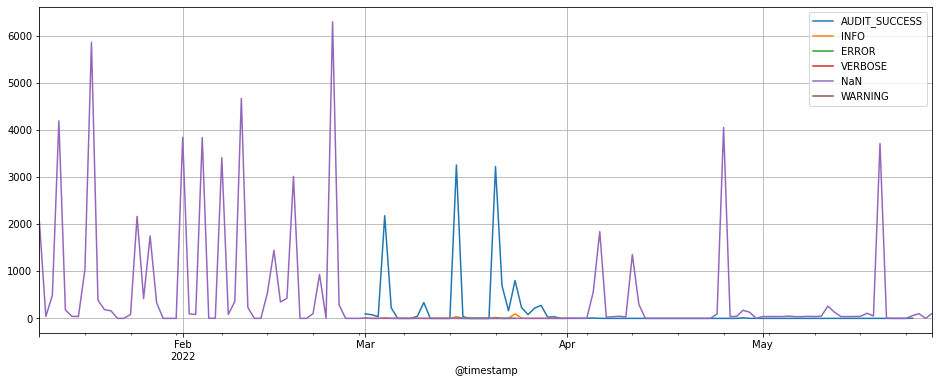

In [5]:
fig, ax = plt.subplots(figsize = (16,6))


data['action'][data['action'] == 'AUDIT_SUCCESS'].resample('D').count().plot(label = 'AUDIT_SUCCESS')
data['action'][data['action'] == 'INFO'].resample('D').count().plot(label = 'INFO')
data['action'][data['action'] == 'ERROR'].resample('D').count().plot(label = 'ERROR')
data['action'][data['action'] == 'VERBOSE'].resample('D').count().plot(label = 'VERBOSE')
data['action'][data['action'] == 'NaN'].resample('D').count().plot(label = 'NaN')
data['action'][data['action'] == 'WARNING'].resample('D').count().plot(label = 'WARNING')
ax.grid(True)


ax.legend()

plt.show()

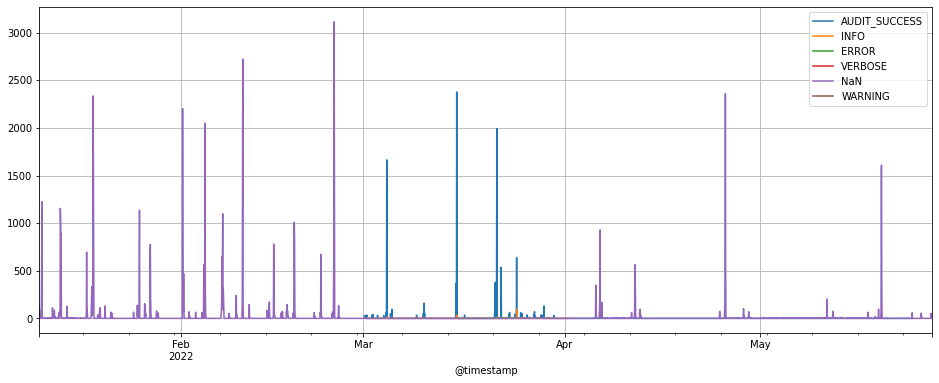

In [6]:
fig, ax = plt.subplots(figsize = (16,6))


data['action'][data['action'] == 'AUDIT_SUCCESS'].resample('H').count().plot(label = 'AUDIT_SUCCESS')
data['action'][data['action'] == 'INFO'].resample('H').count().plot(label = 'INFO')
data['action'][data['action'] == 'ERROR'].resample('H').count().plot(label = 'ERROR')
data['action'][data['action'] == 'VERBOSE'].resample('H').count().plot(label = 'VERBOSE')
data['action'][data['action'] == 'NaN'].resample('H').count().plot(label = 'NaN')
data['action'][data['action'] == 'WARNING'].resample('H').count().plot(label = 'WARNING')
ax.grid(True)


ax.legend()

plt.show()

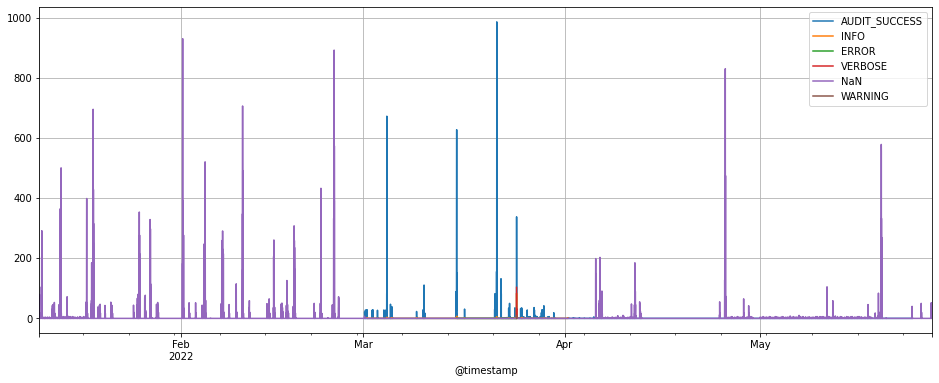

In [7]:
fig, ax = plt.subplots(figsize = (16,6))

data['action'][data['action'] == 'AUDIT_SUCCESS'].resample('5T').count().plot(label = 'AUDIT_SUCCESS')
data['action'][data['action'] == 'INFO'].resample('5T').count().plot(label = 'INFO')
data['action'][data['action'] == 'ERROR'].resample('5T').count().plot(label = 'ERROR')
data['action'][data['action'] == 'VERBOSE'].resample('5T').count().plot(label = 'VERBOSE')
data['action'][data['action'] == 'NaN'].resample('5T').count().plot(label = 'NaN')
data['action'][data['action'] == 'WARNING'].resample('5T').count().plot(label = 'WARNING')
ax.grid(True)


ax.legend()

plt.show()

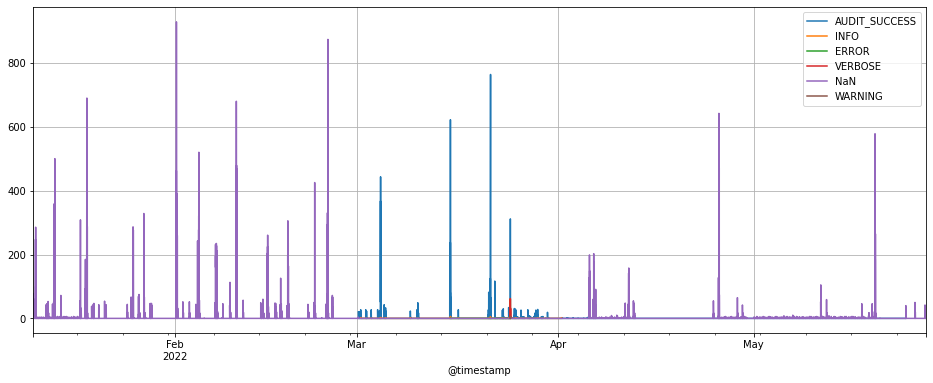

In [8]:
fig, ax = plt.subplots(figsize = (16,6))

data['action'][data['action'] == 'AUDIT_SUCCESS'].resample('1T').count().plot(label = 'AUDIT_SUCCESS')
data['action'][data['action'] == 'INFO'].resample('1T').count().plot(label = 'INFO')
data['action'][data['action'] == 'ERROR'].resample('1T').count().plot(label = 'ERROR')
data['action'][data['action'] == 'VERBOSE'].resample('1T').count().plot(label = 'VERBOSE')
data['action'][data['action'] == 'NaN'].resample('1T').count().plot(label = 'NaN')
data['action'][data['action'] == 'WARNING'].resample('1T').count().plot(label = 'WARNING')
ax.grid(True)


ax.legend()

plt.show()

Создаю фиксированные окна с интервалами в 10 минут и 1 минутой

In [9]:
pd.get_dummies(data['event_id']).resample('10T').sum().astype('int32')

,16,1074,4104,4624,4625,4627,4634,4647,4648,4663,...,5142,5144,5145,8193,8194,8195,8196,10010,12039,53504
@timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-10 06:00:00+00:00,0,0,0,5,0,2,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-10 06:10:00+00:00,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-10 06:20:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-10 06:30:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-10 06:40:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27 10:20:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-05-27 10:30:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-05-27 10:40:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
pd.get_dummies(data['event_id']).resample('1T').sum().astype('int32')

,16,1074,4104,4624,4625,4627,4634,4647,4648,4663,...,5142,5144,5145,8193,8194,8195,8196,10010,12039,53504
@timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-10 06:00:00+00:00,0,0,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-10 06:01:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-10 06:02:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-10 06:03:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-01-10 06:04:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27 11:03:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-05-27 11:04:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-05-27 11:05:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Аномалии

In [11]:
data.iloc[41755]

target_ip                         target_ip_0
ip                                       ip_0
category                           category_0
create_time    2022-02-18T12:24:48.147825000Z
host_id                             host_id_0
event_id                                 4624
source                               source_0
box_id                               box_id_0
source_ip                         source_ip_0
action                                    NaN
Name: 2022-02-18 12:34:03.774000+00:00, dtype: object

In [12]:
data.iloc[31298]

target_ip                         target_ip_0
ip                                       ip_0
category                           category_0
create_time    2022-02-10T10:36:31.642264700Z
host_id                             host_id_0
event_id                                 4624
source                               source_0
box_id                               box_id_0
source_ip                         source_ip_0
action                                    NaN
Name: 2022-02-10 10:49:03.115000+00:00, dtype: object

Отображаю события происходившие в феврале

<AxesSubplot:xlabel='@timestamp', ylabel='event_id'>

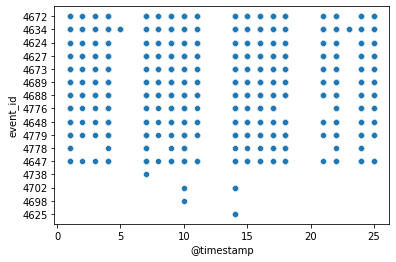

In [13]:
sns.scatterplot(data=data['2022-02-1':'2022-02-28'].astype({'event_id': str}), 
                x=data['2022-02-1':'2022-02-28'].astype({'event_id': str}).index.day, y="event_id")

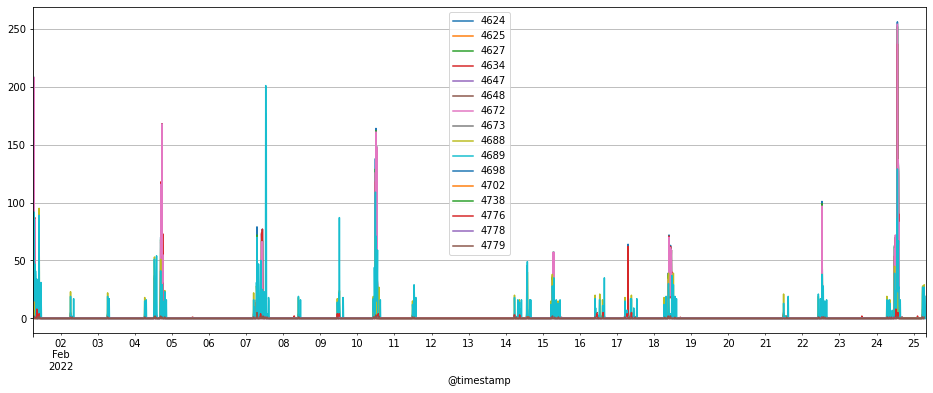

In [14]:
fig, ax = plt.subplots(figsize = (16,6))

for i in np.unique(data['event_id']['2022-02-1':'2022-02-28']):
    data['event_id']['2022-02-1':'2022-02-28'][data['event_id']['2022-02-1':'2022-02-28'] == i].resample('10T').count().plot(label = str(i))

ax.grid(True)


ax.legend()

plt.show()

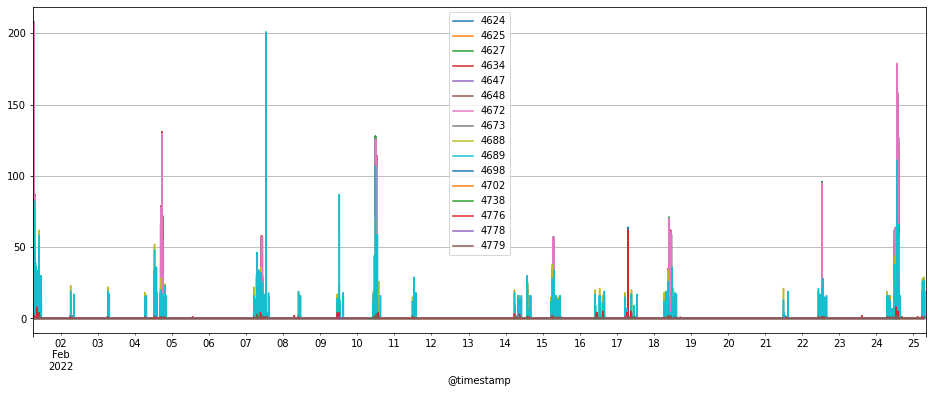

In [15]:
fig, ax = plt.subplots(figsize = (16,6))

for i in np.unique(data['event_id']['2022-02-1':'2022-02-28']):
    data['event_id']['2022-02-1':'2022-02-28'][data['event_id']['2022-02-1':'2022-02-28'] == i].resample('1T').count().plot(label = str(i))

ax.grid(True)


ax.legend()

plt.show()

Смотрю на частоту встречаемости каждого event_id

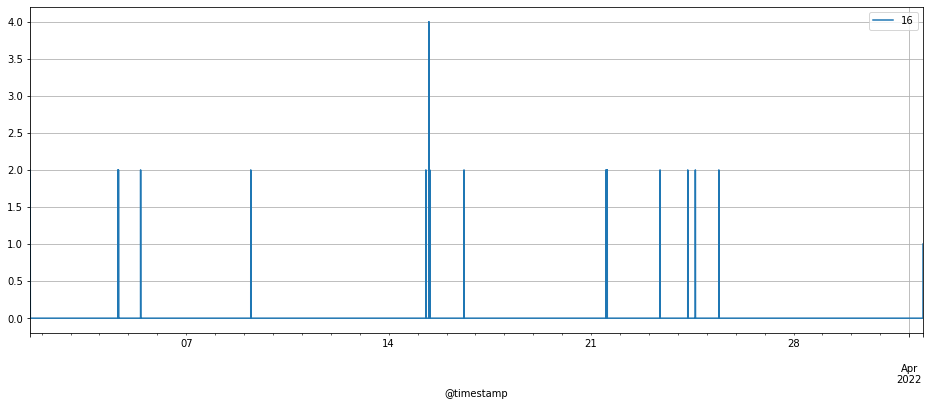

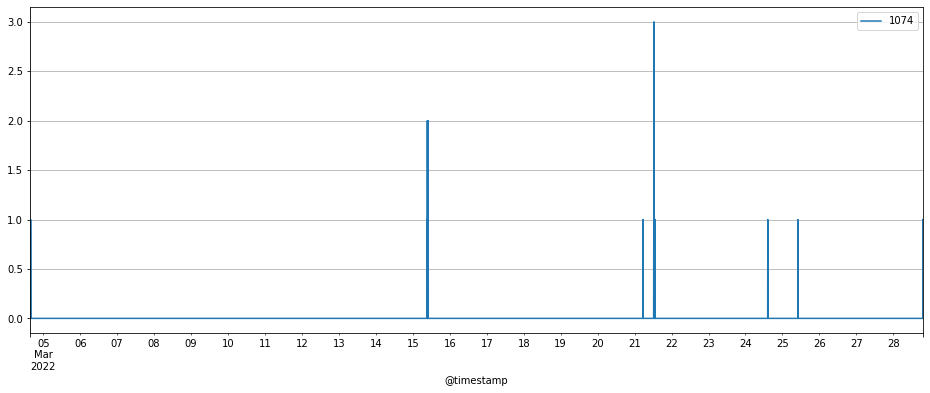

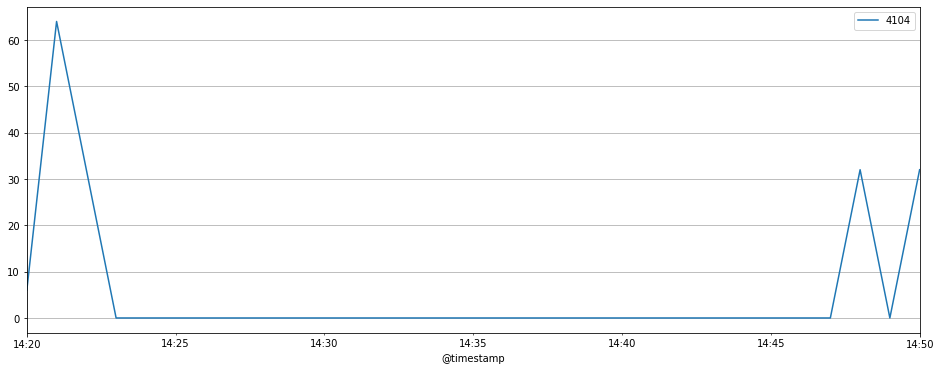

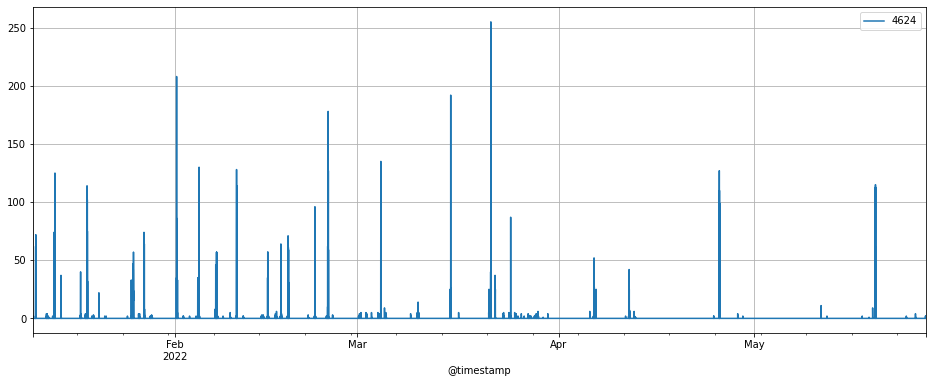

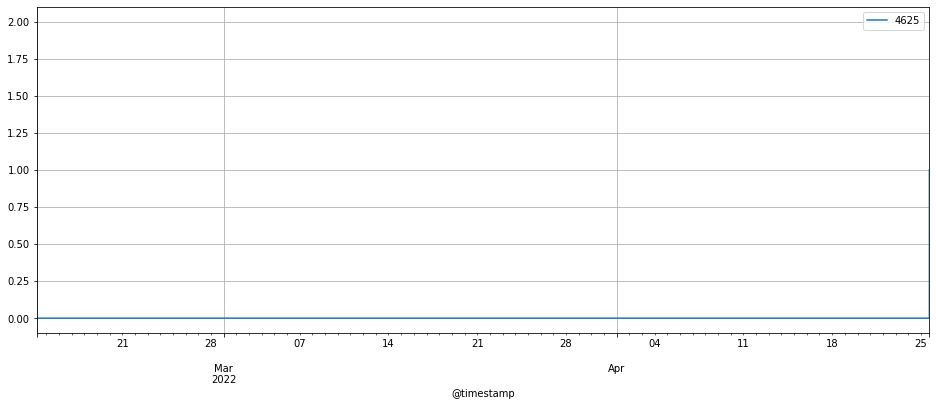

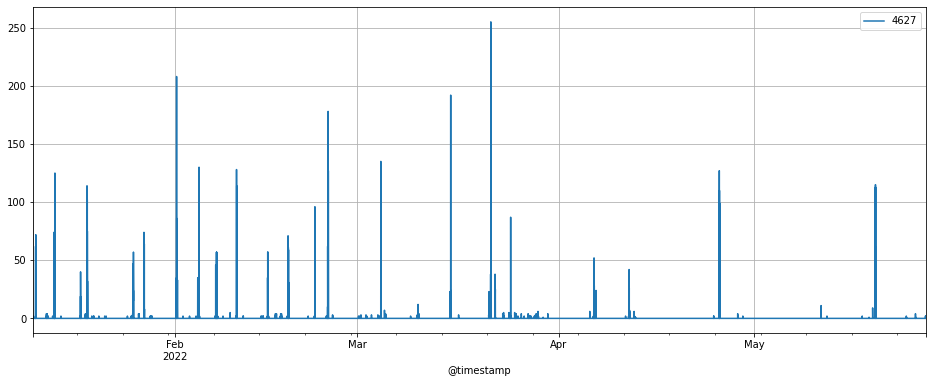

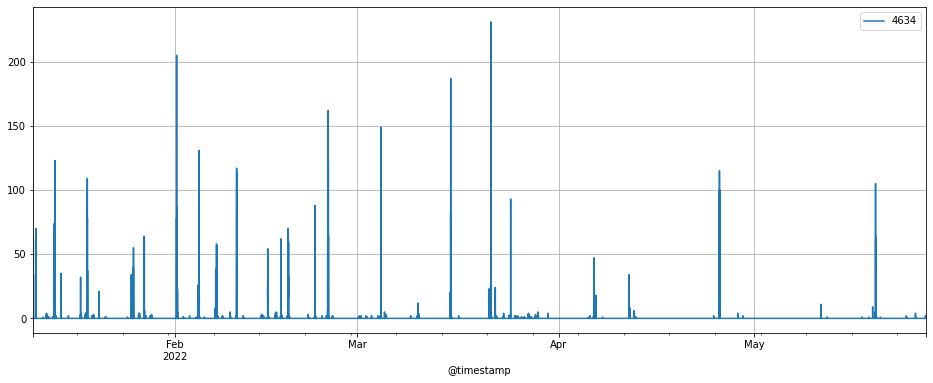

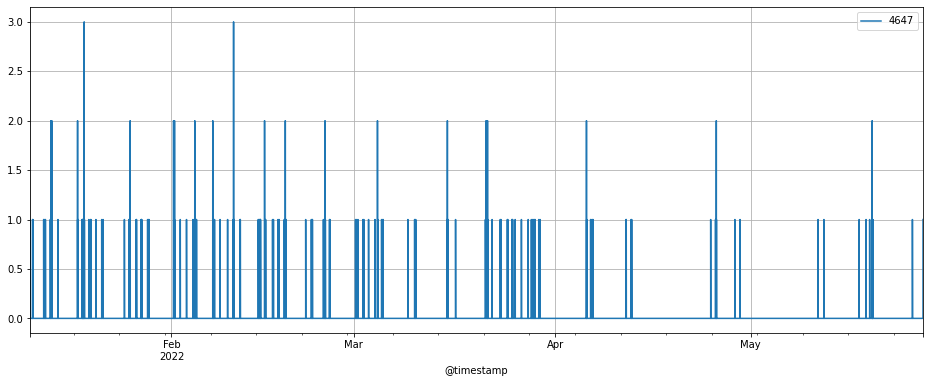

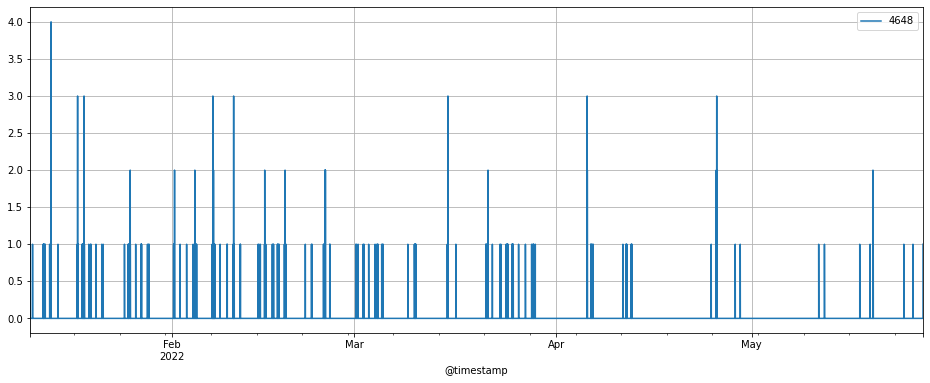

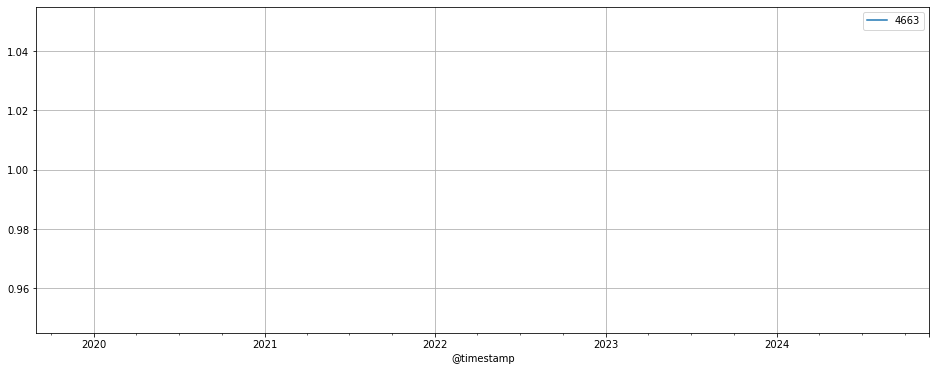

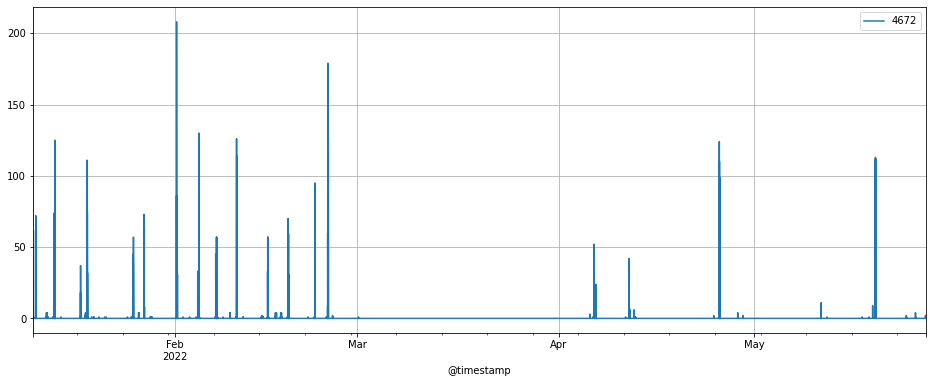

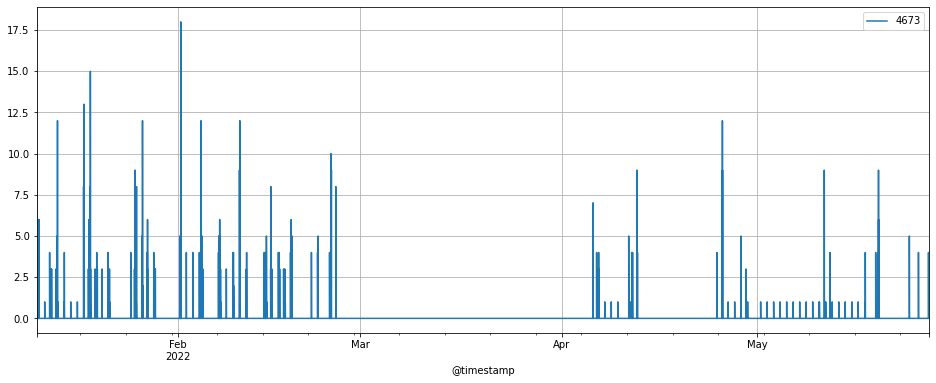

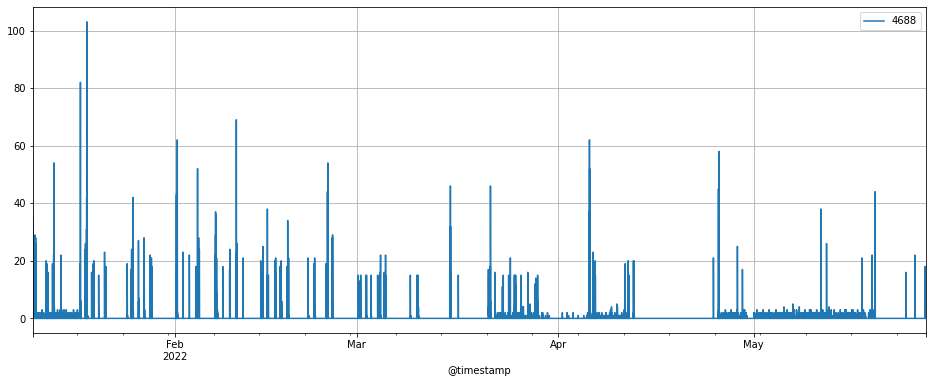

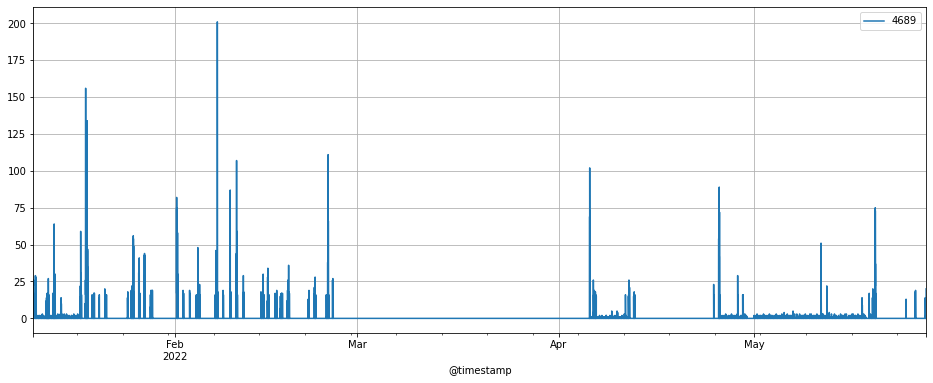

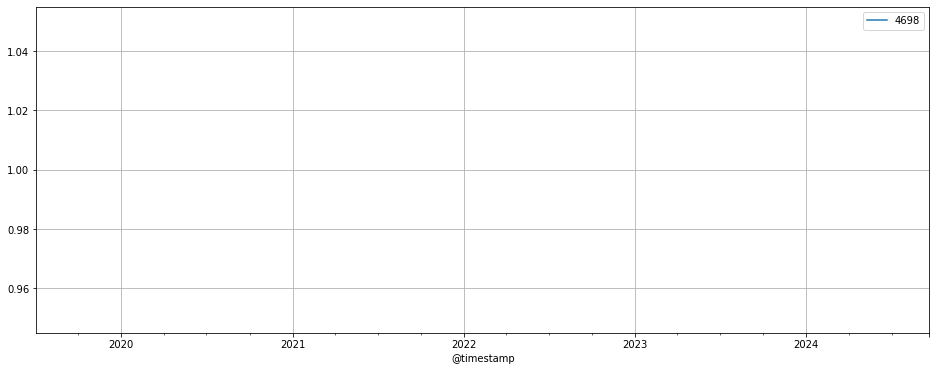

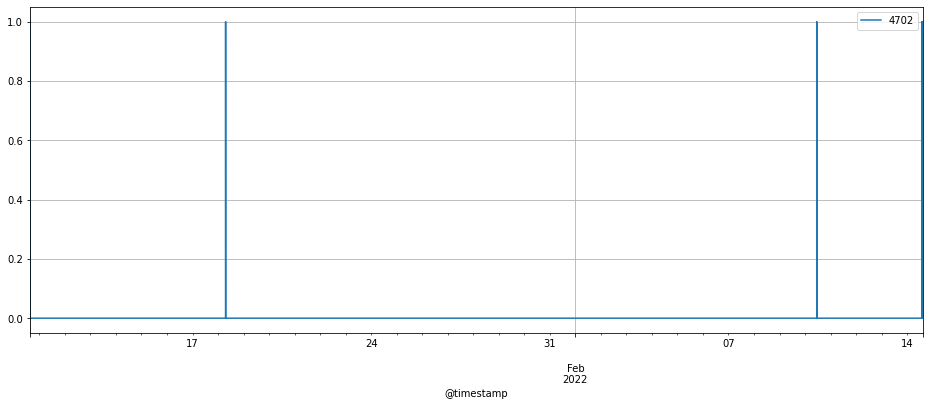

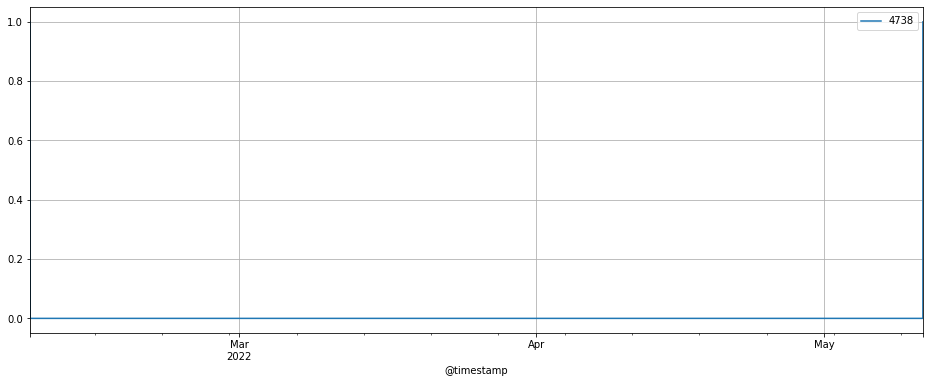

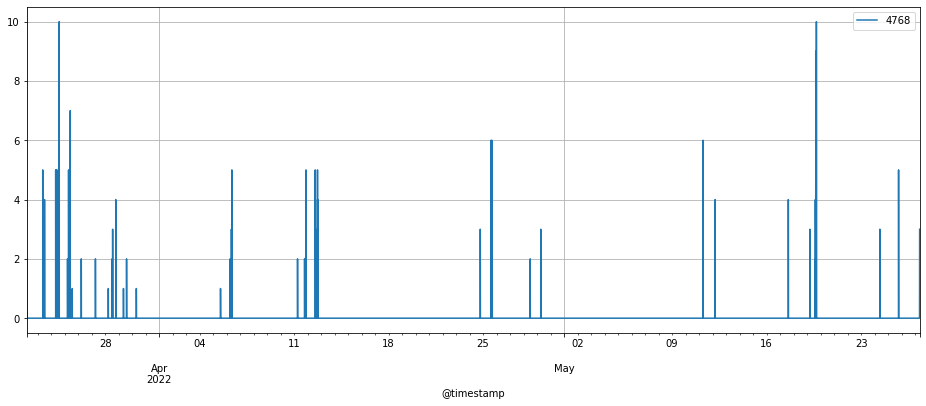

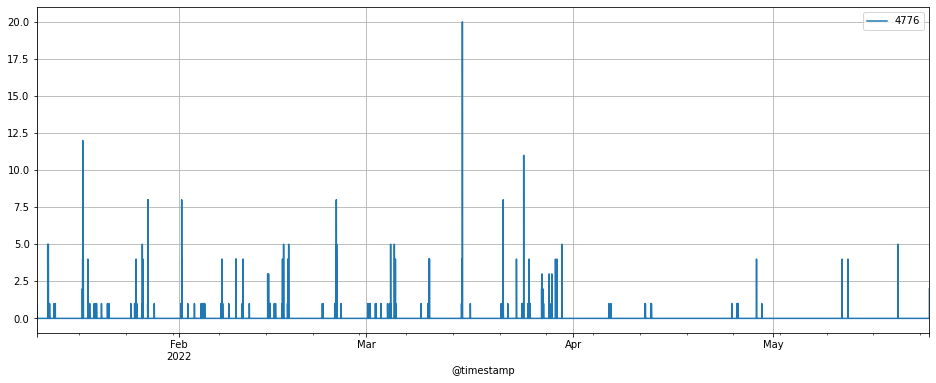

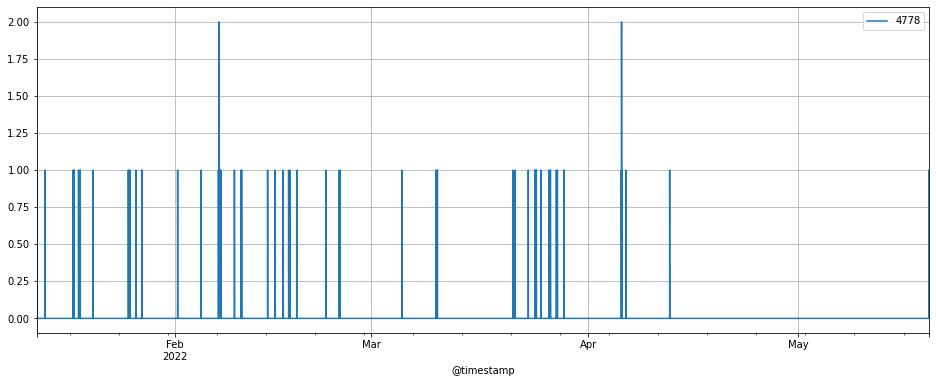

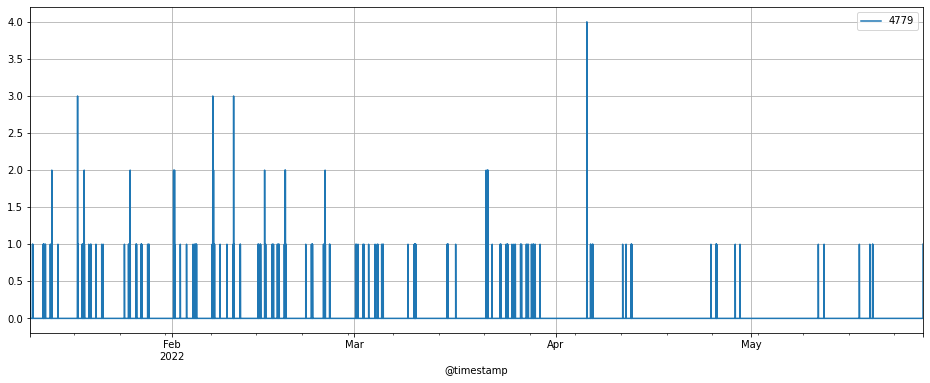

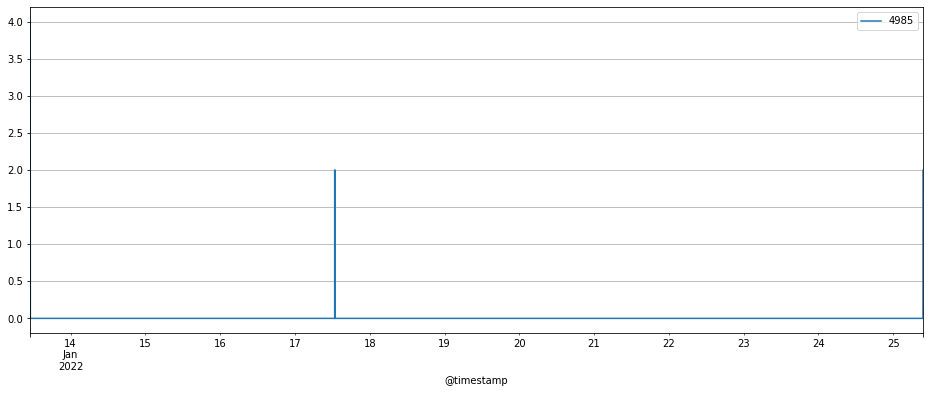

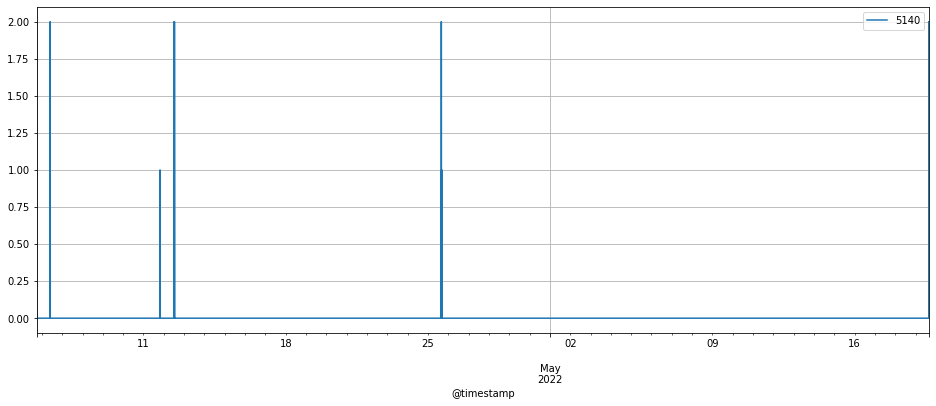

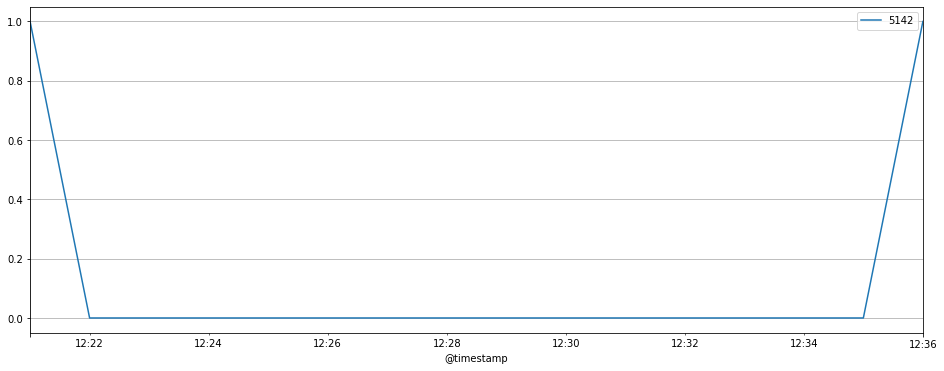

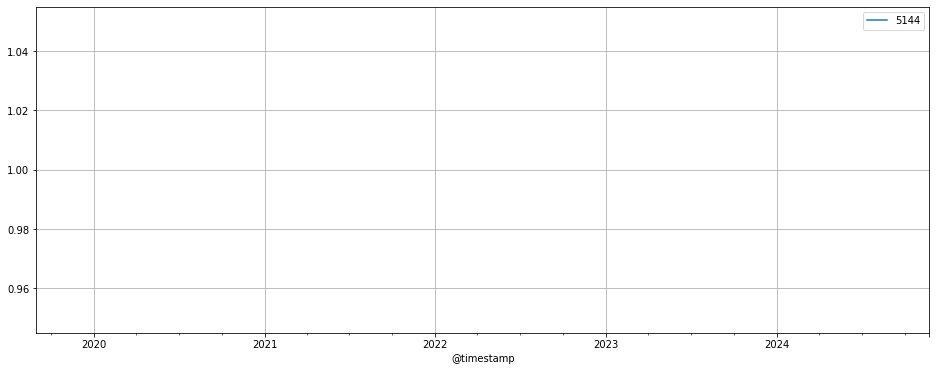

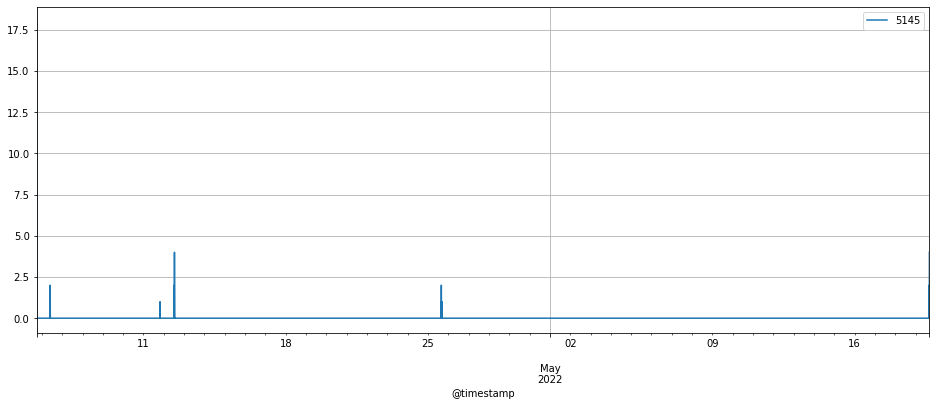

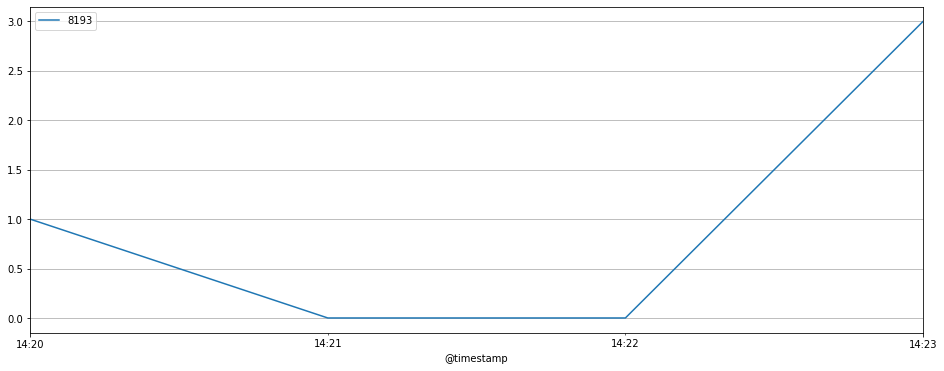

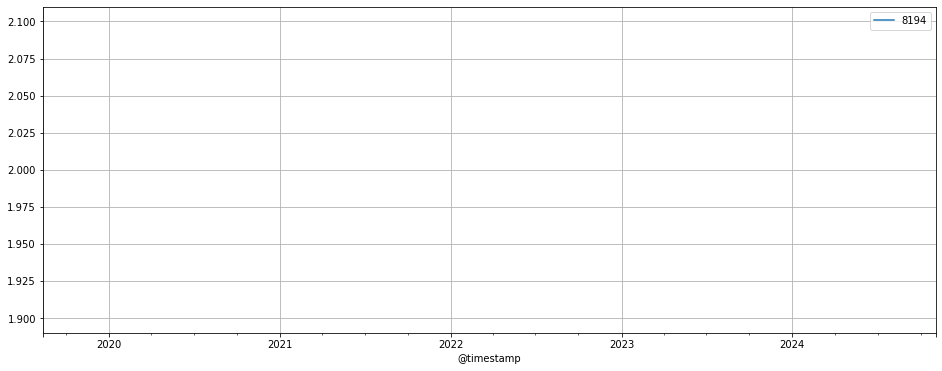

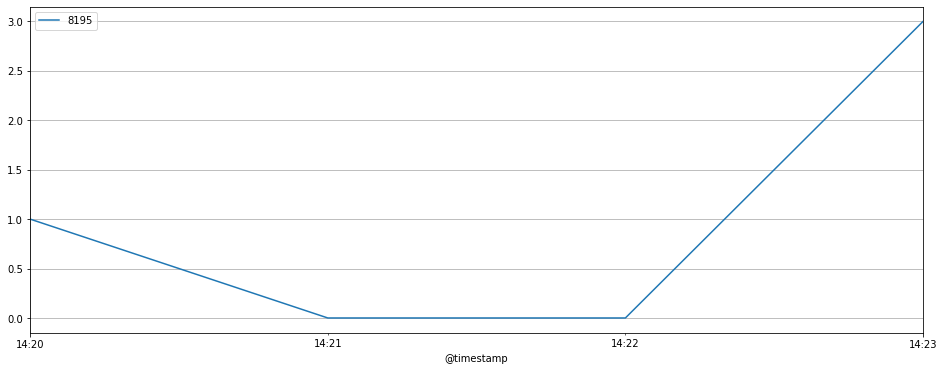

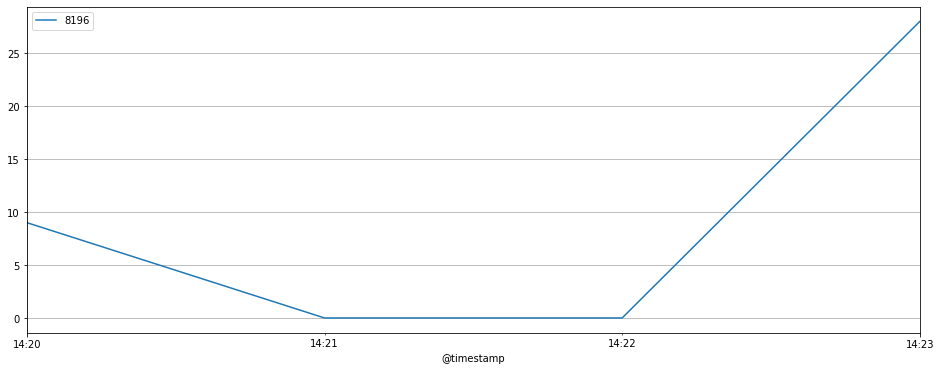

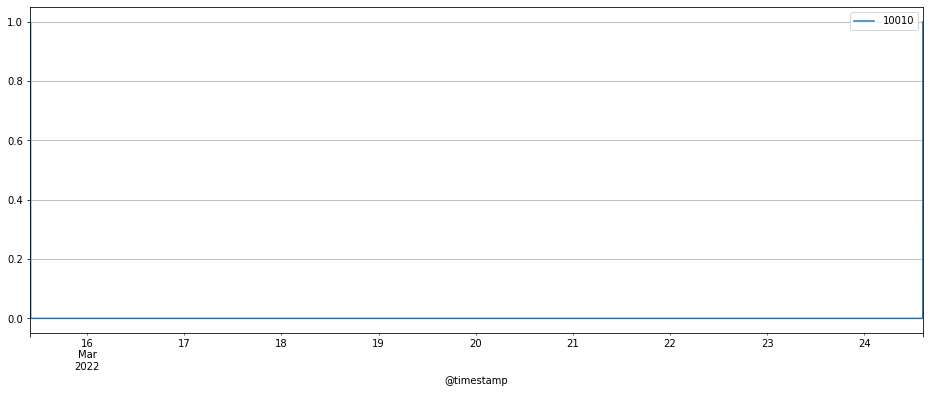

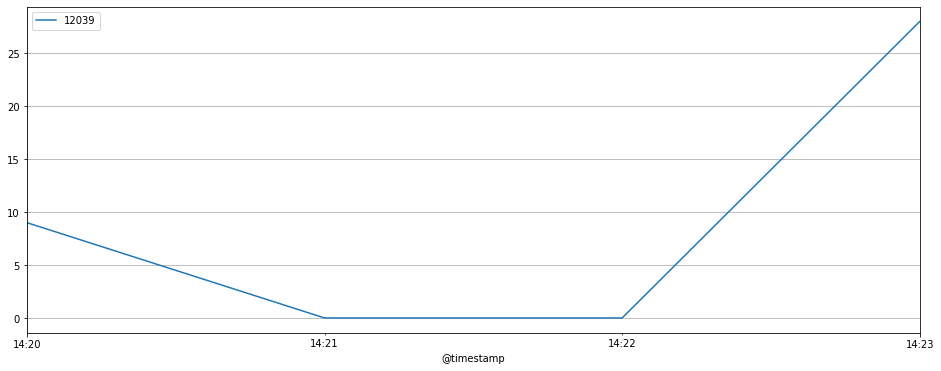

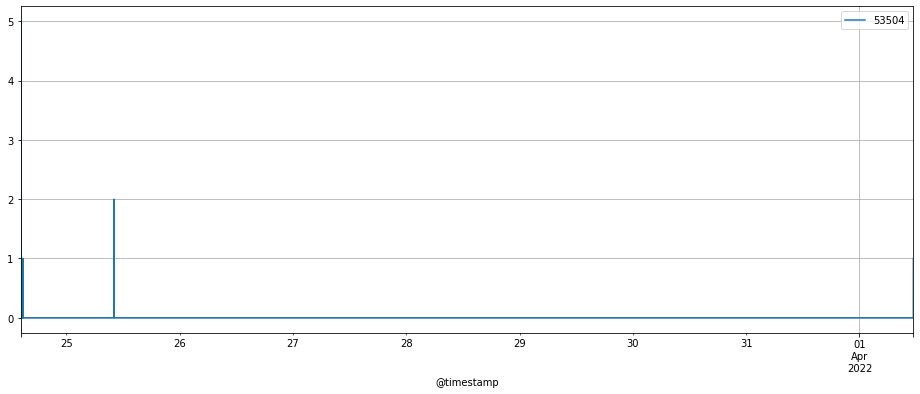

In [16]:
for i in np.unique(data['event_id']):
    fig, ax = plt.subplots(figsize = (16,6))
    data['event_id'][data['event_id'] == i].resample('1T').count().plot(label = str(i))

    ax.grid(True)


    ax.legend()

    plt.show()

events for Audit success: 4627 - Это единственное событие новой подкатегории «Членство в группе». Одно или несколько из этих событий регистрируются всякий раз, когда пользователь входит в систему или сеанс входа начинается по любой другой причине 4688 - процесс, созданный при запуске программы и остающийся открытым до ее закрытия 4624 - успешная попытка входа в систему на локальном компьютере

Смотрю активность каждого ip

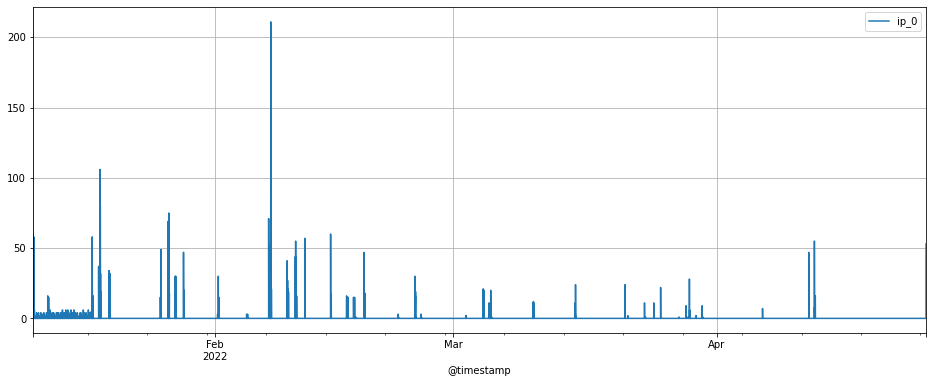

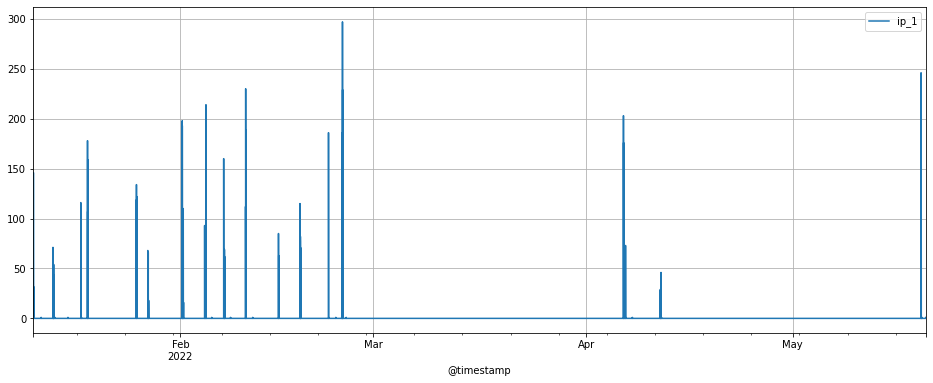

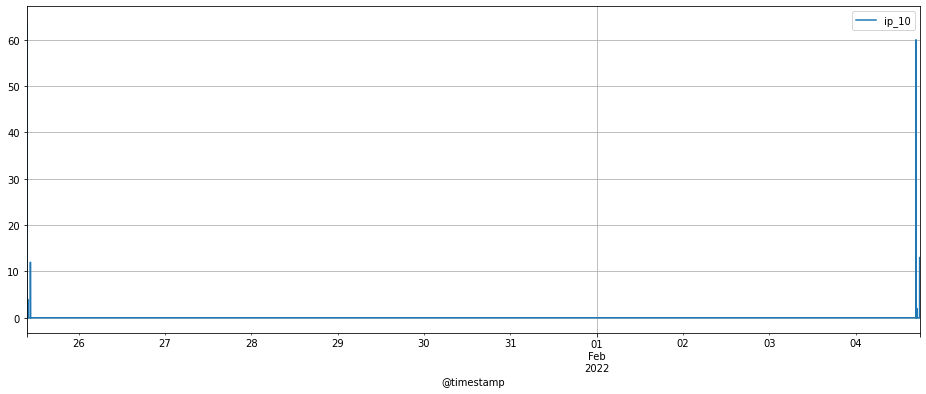

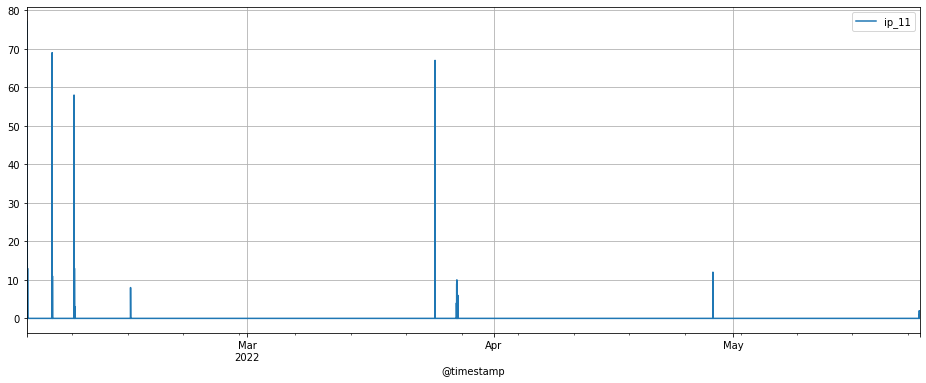

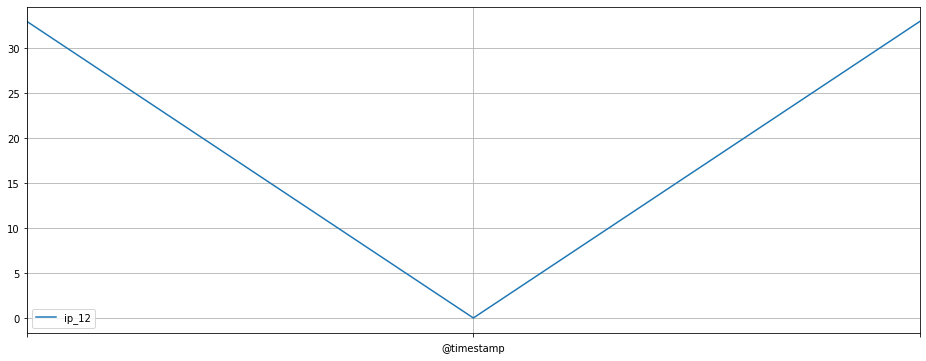

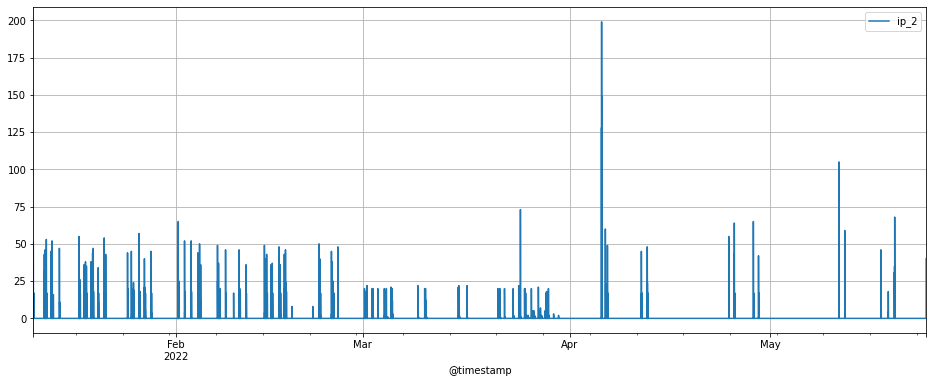

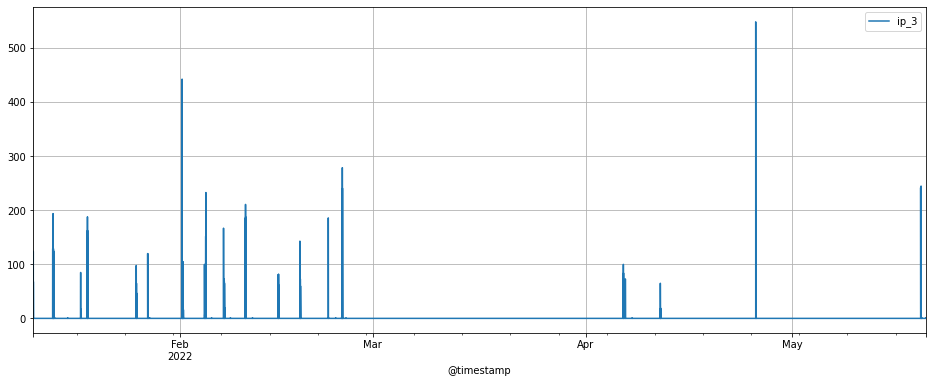

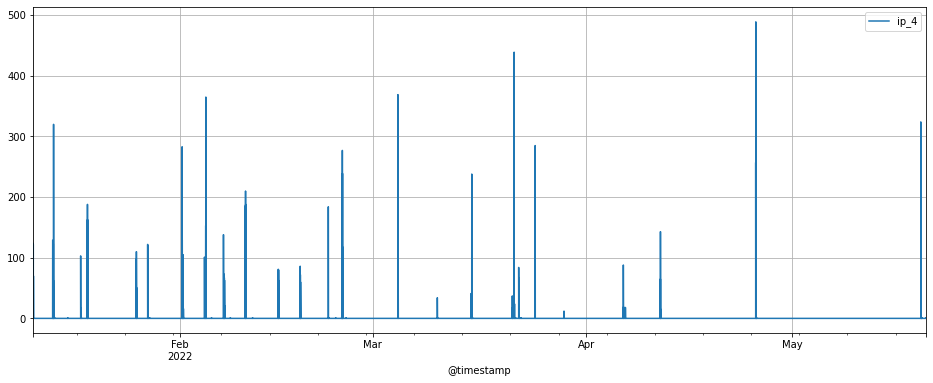

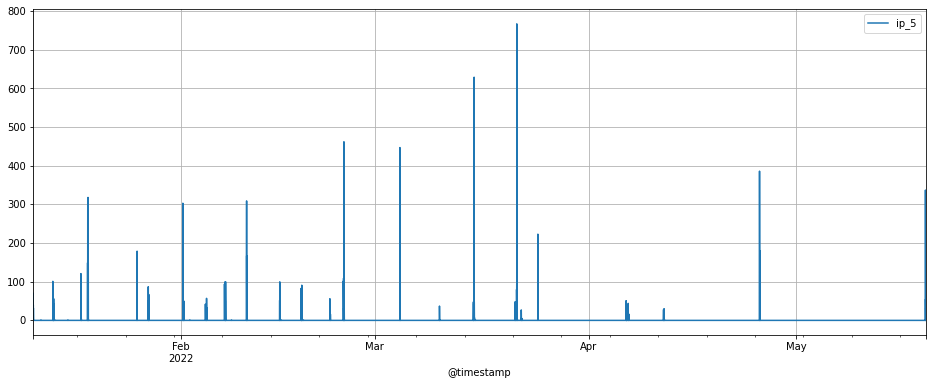

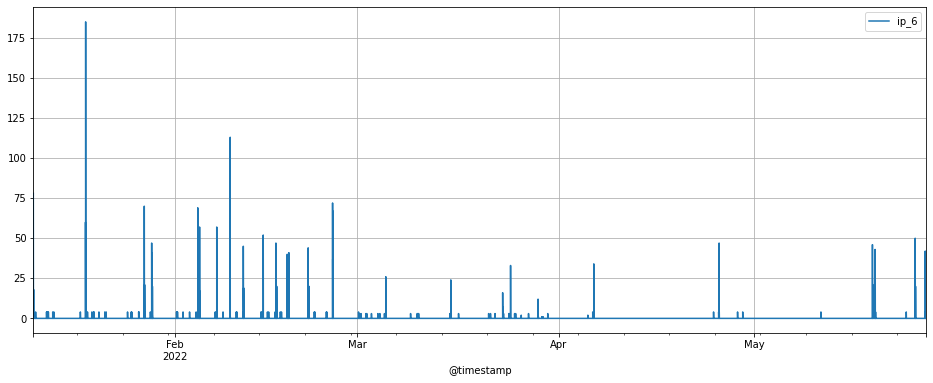

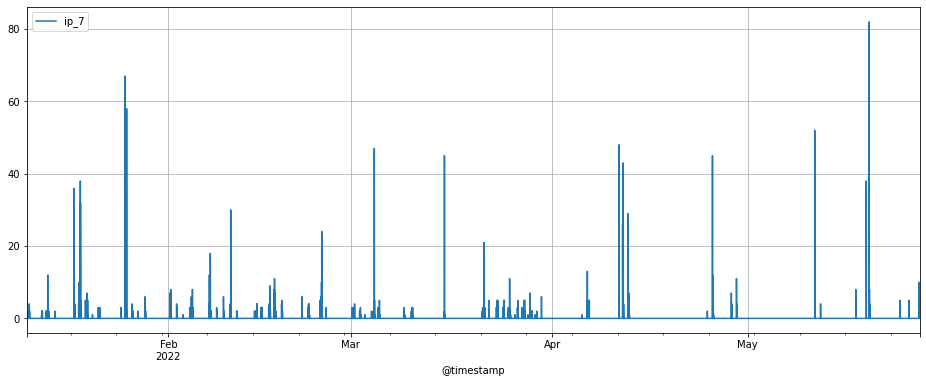

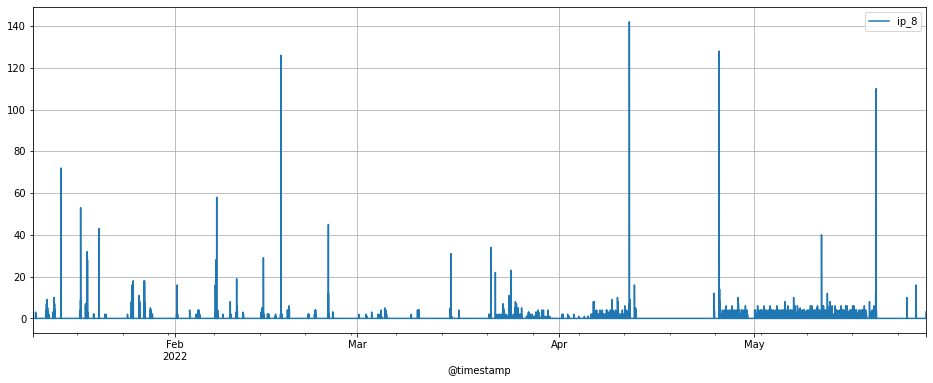

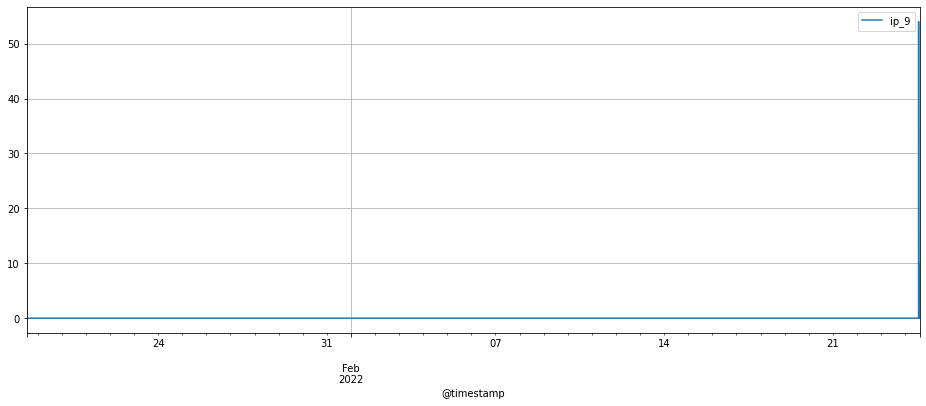

In [17]:
for i in np.unique(data['ip']):
    fig, ax = plt.subplots(figsize = (16,6))
    data['ip'][data['ip'] == i].resample('1T').count().plot(label = str(i))

    ax.grid(True)


    ax.legend()

    plt.show()

Посмотрим на активность каждого пользователя

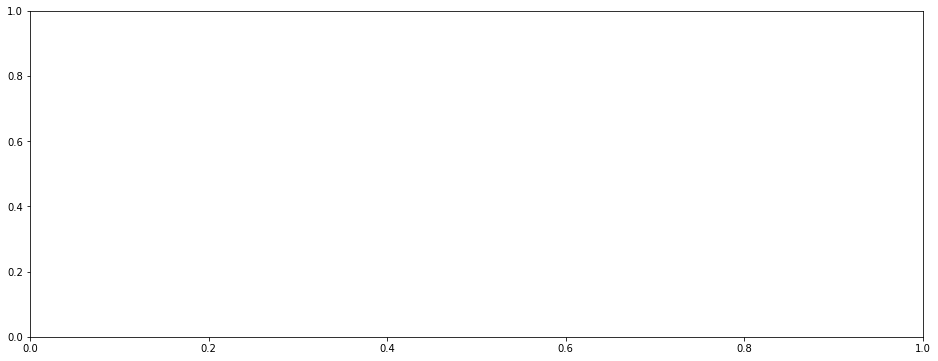

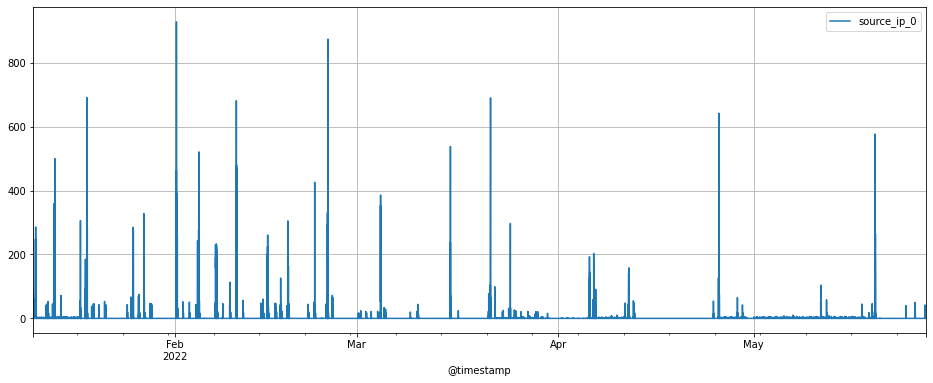

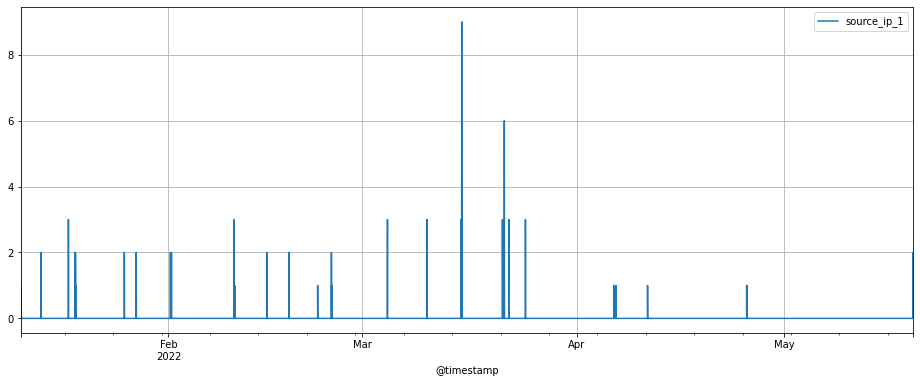

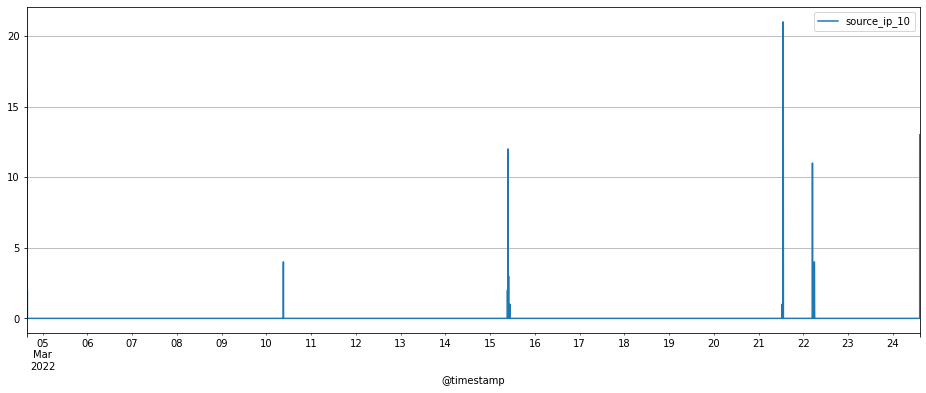

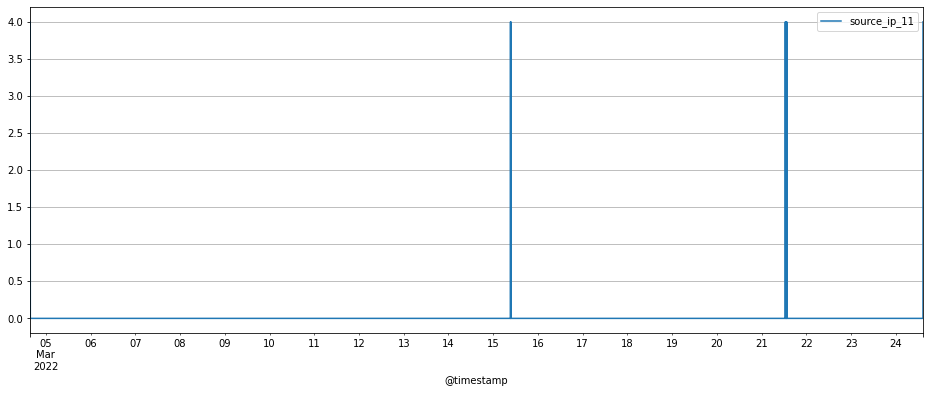

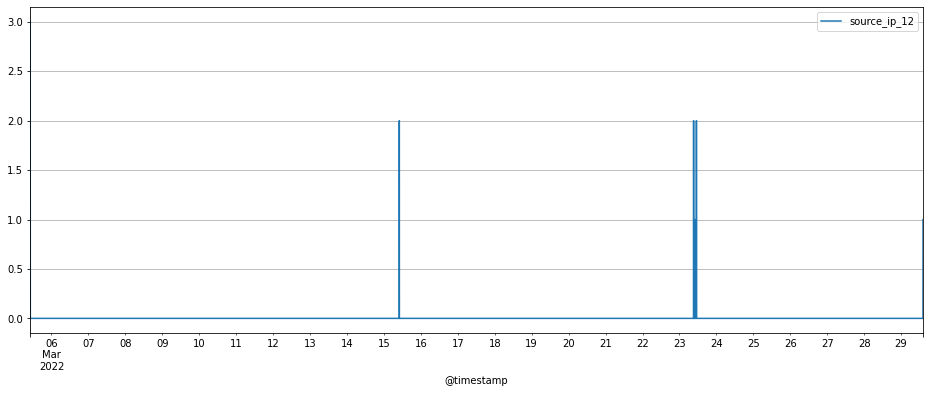

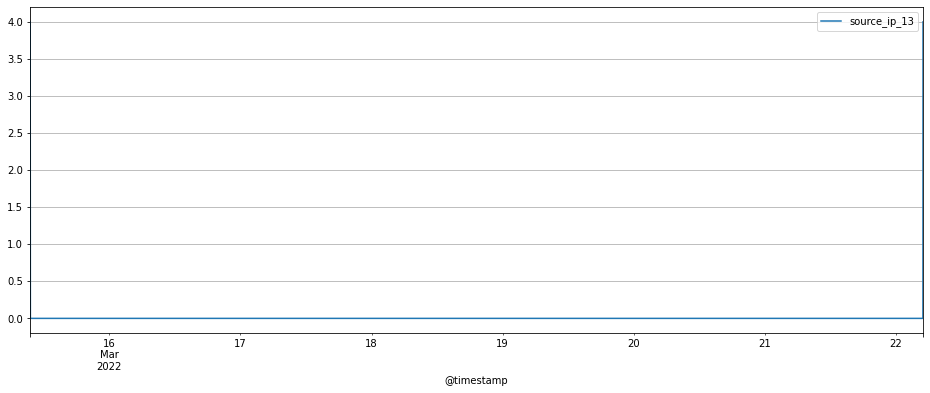

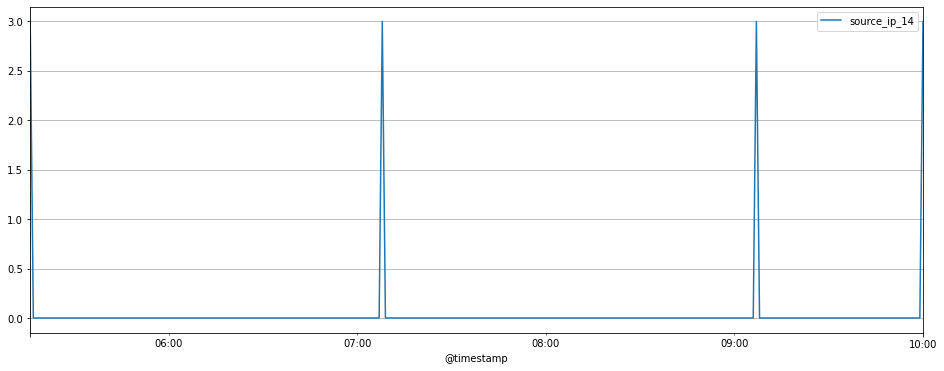

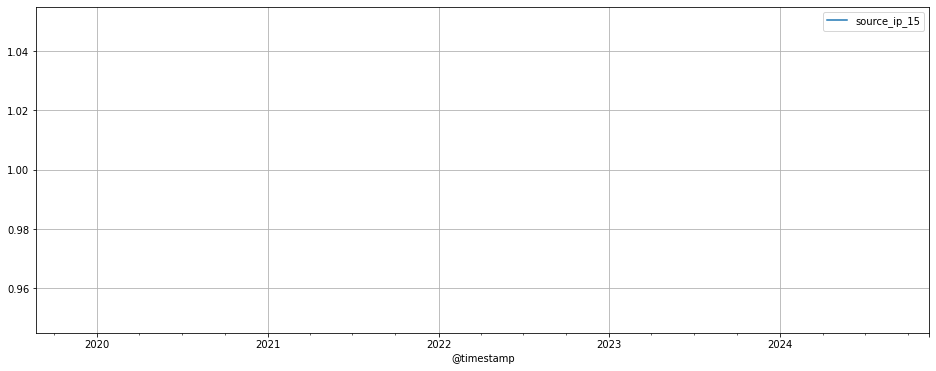

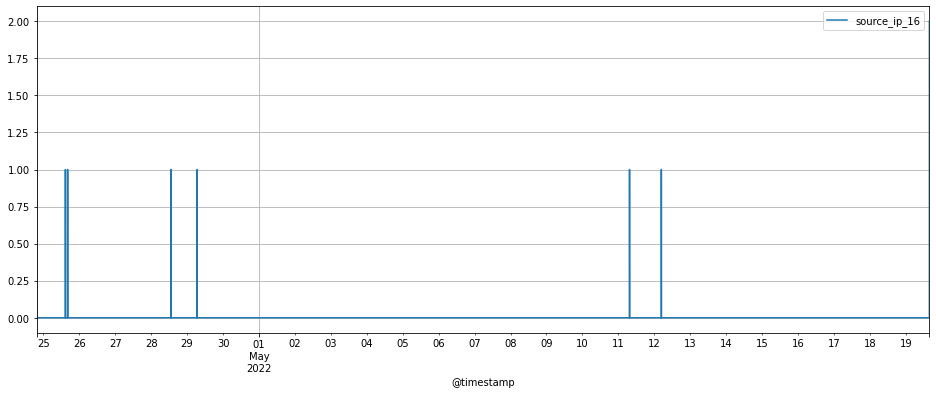

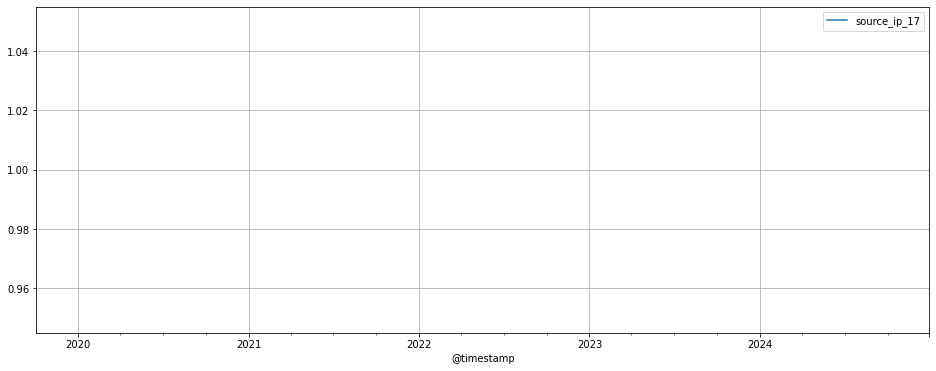

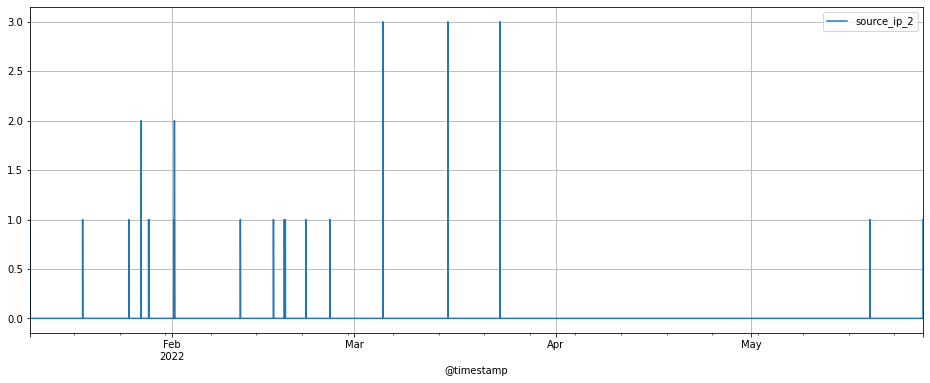

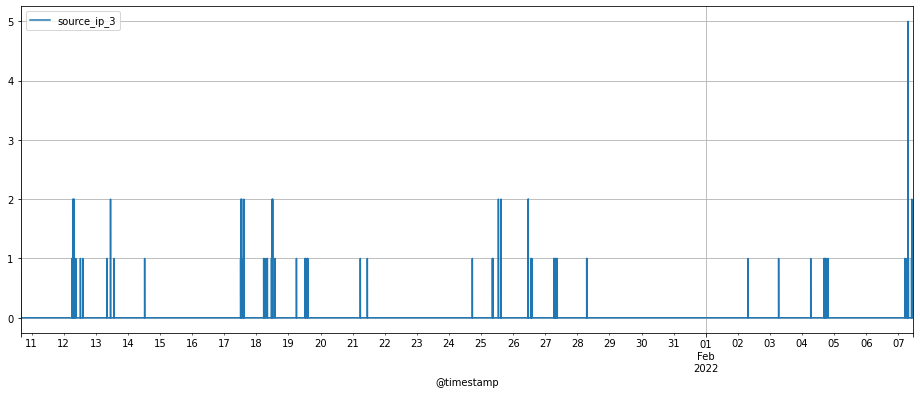

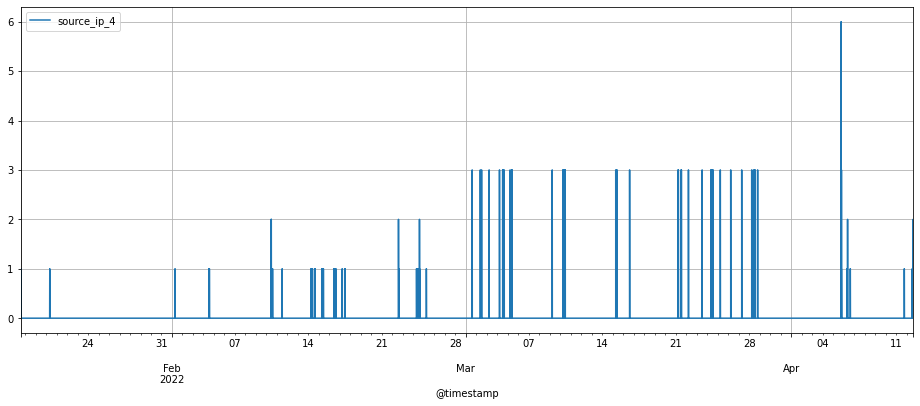

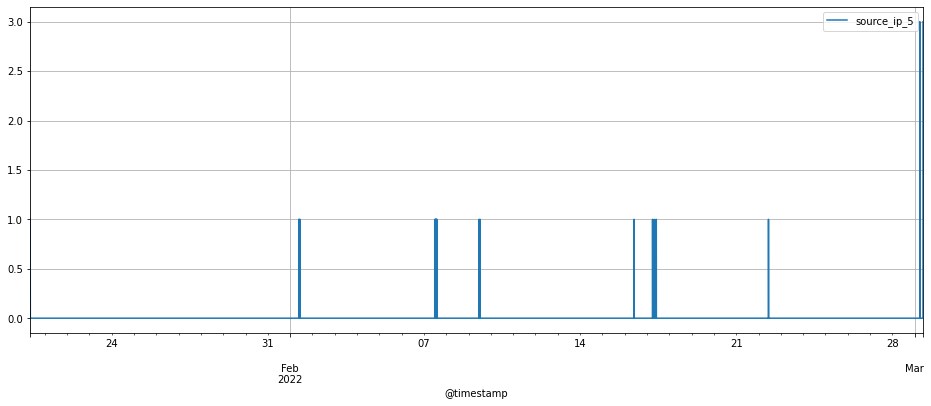

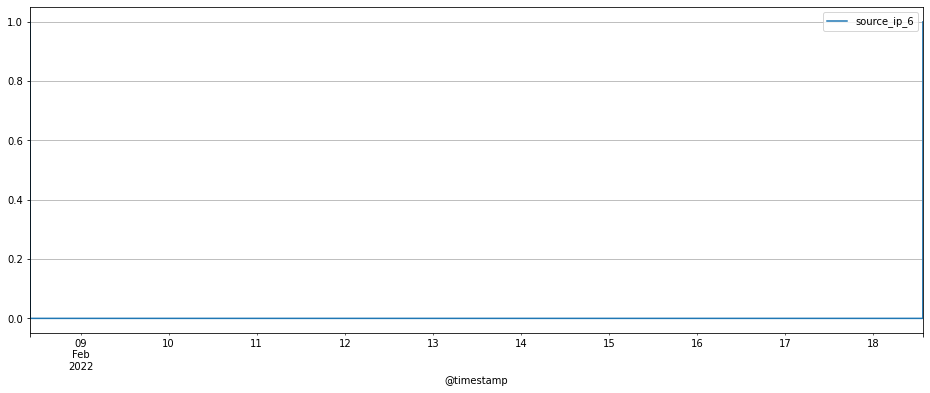

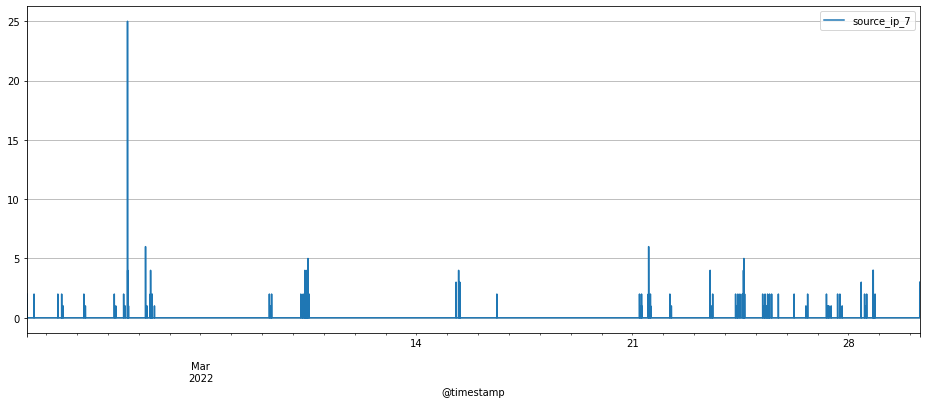

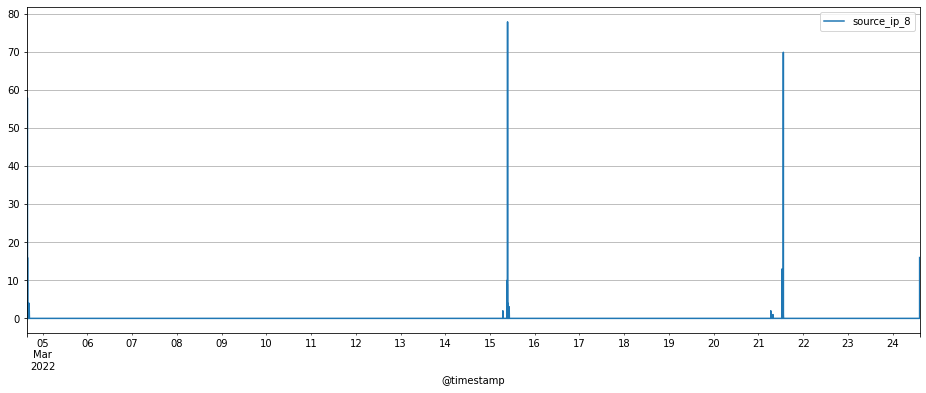

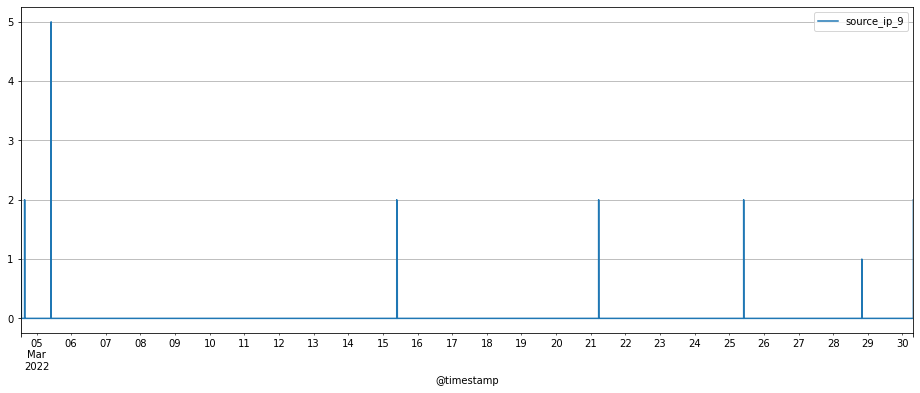

In [18]:
fig, ax = plt.subplots(figsize = (16,6))

for i in np.unique(data['source_ip']):
    fig, ax = plt.subplots(figsize = (16,6))
    data['source_ip'][data['source_ip'] == i].resample('1T').count().plot(label = str(i))

    ax.grid(True)


    ax.legend()

    plt.show()

Посмотрим на активность всех пользователей

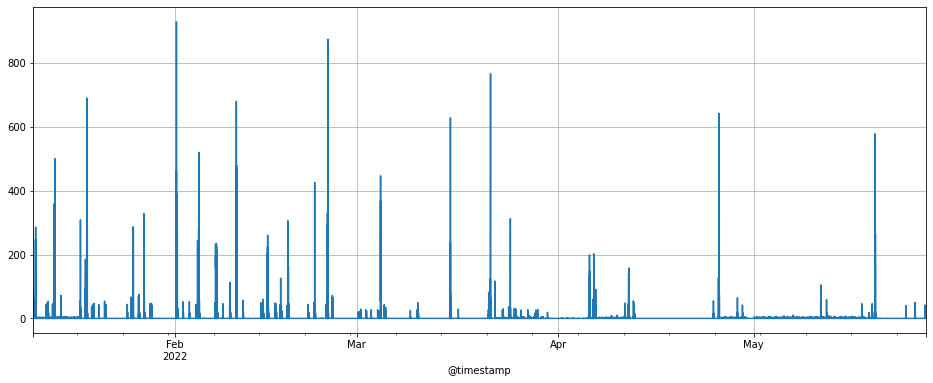

In [19]:
fig, ax = plt.subplots(figsize = (16,6))
data['source_ip'].resample('1T').count().plot()

ax.grid(True)


plt.show()

Посмотрим на активность пользователей в феврале

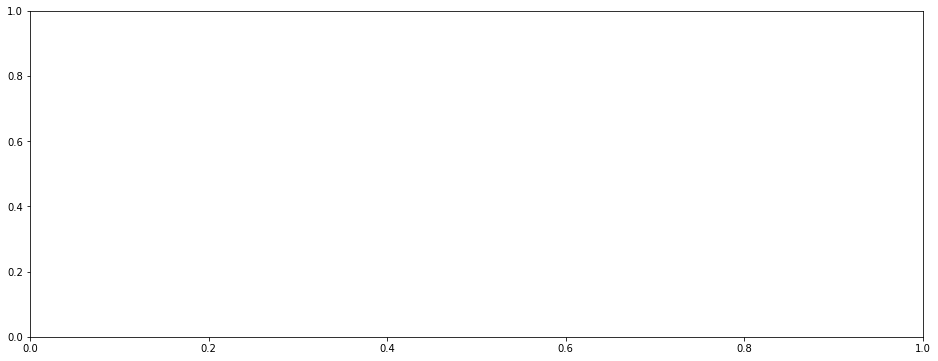

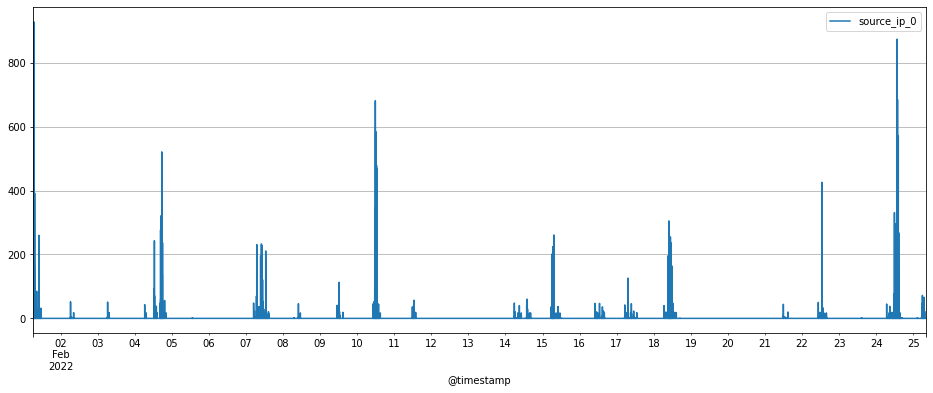

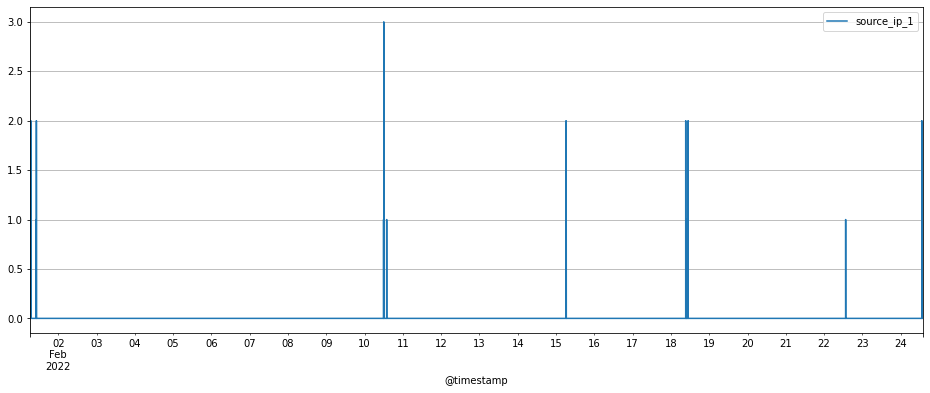

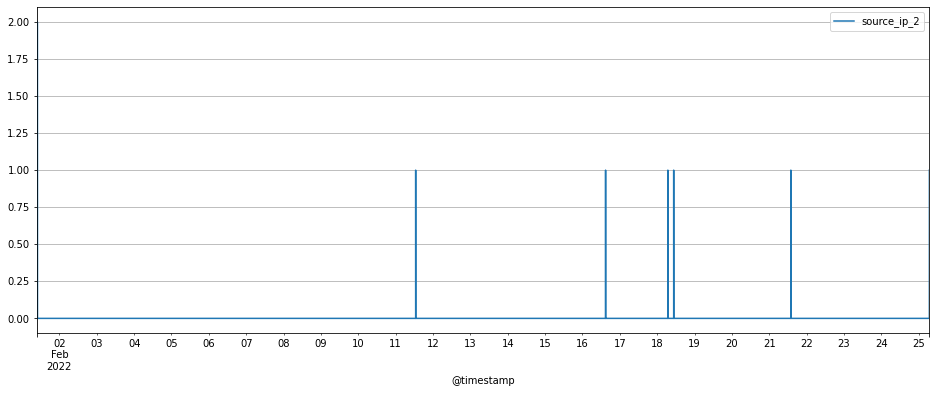

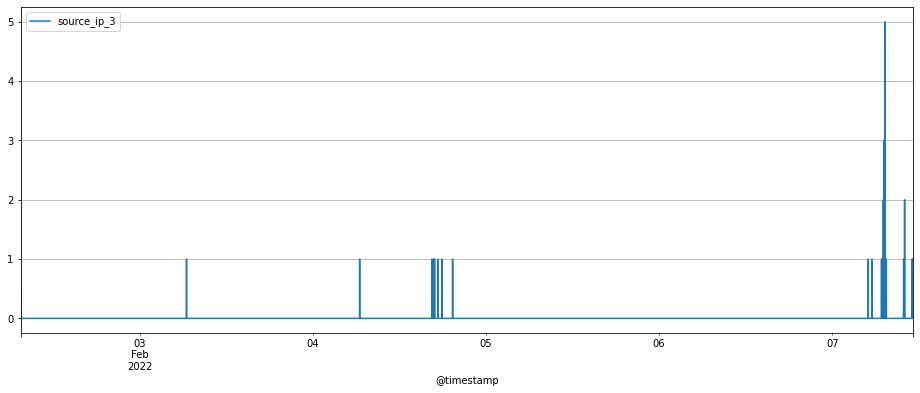

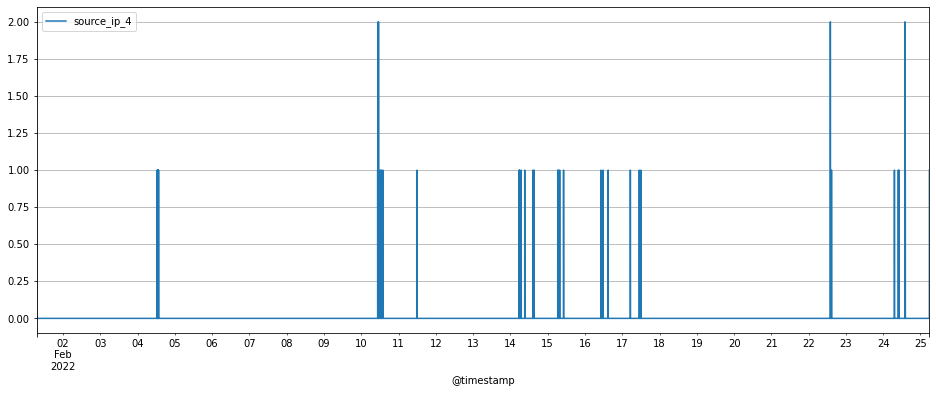

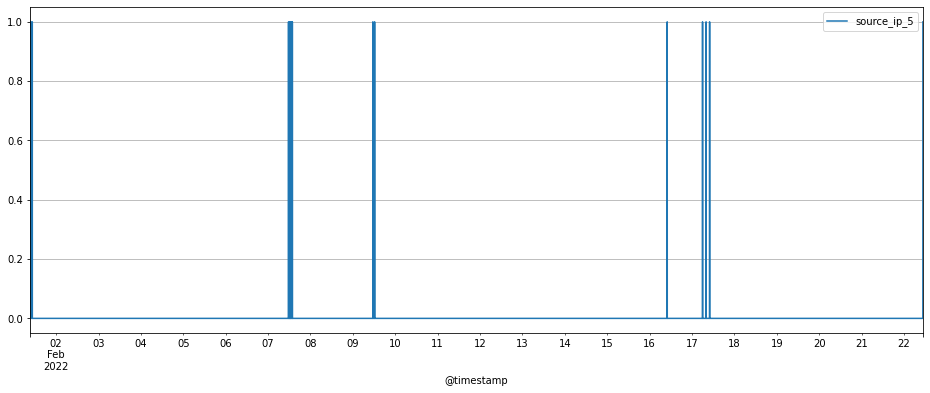

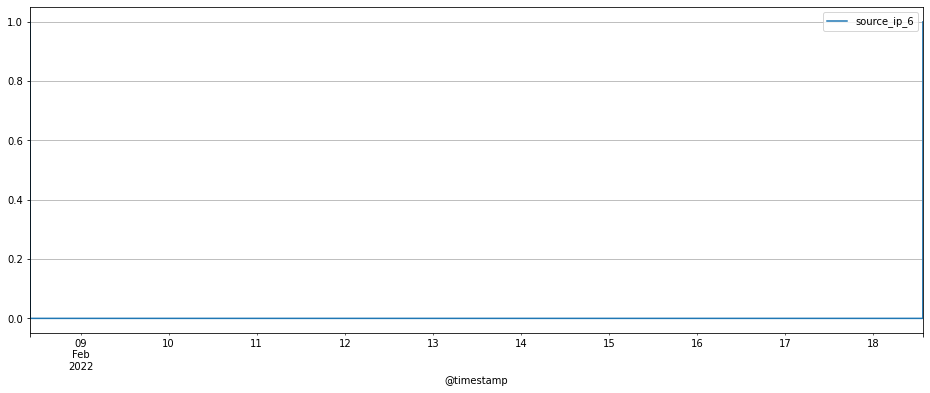

In [20]:
fig, ax = plt.subplots(figsize = (16,6))

for i in np.unique(data['source_ip']['2022-02-1':'2022-02-28']):
    fig, ax = plt.subplots(figsize = (16,6))
    data['source_ip']['2022-02-1':'2022-02-28'][data['source_ip']['2022-02-1':'2022-02-28'] == i].resample('1T').count().plot(label = str(i))

    ax.grid(True)


    ax.legend()

    plt.show()

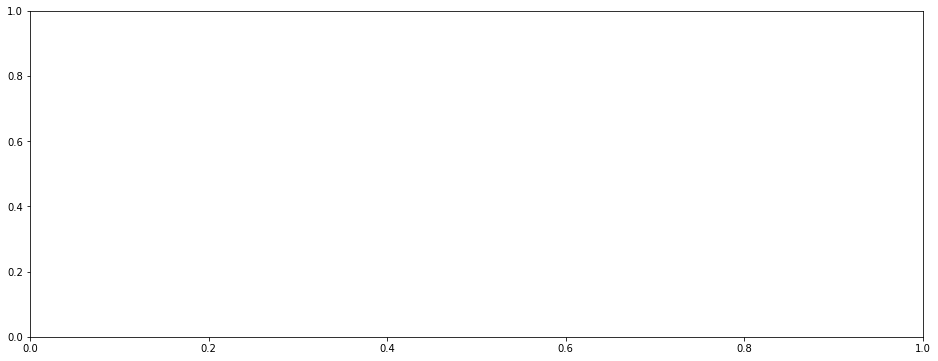

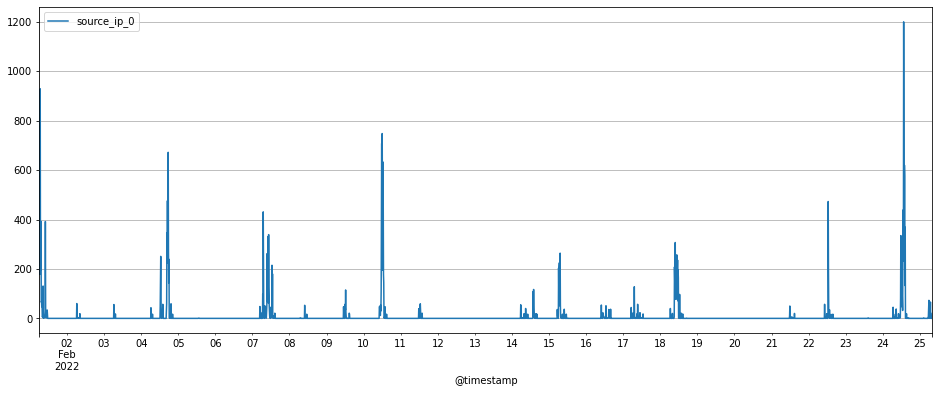

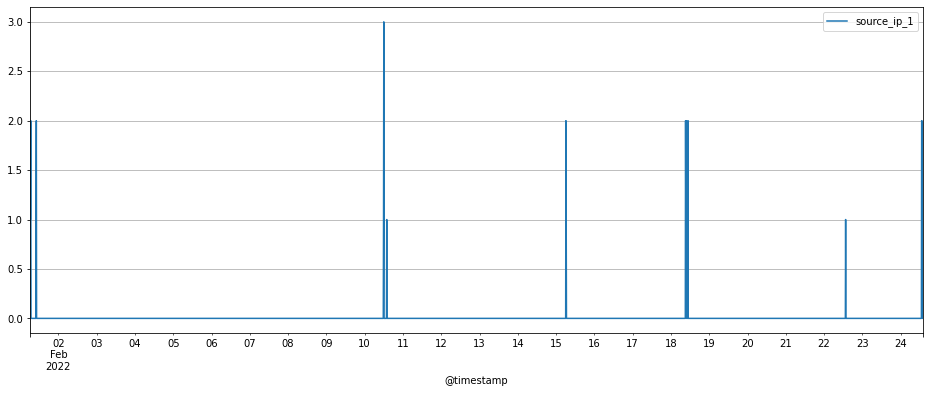

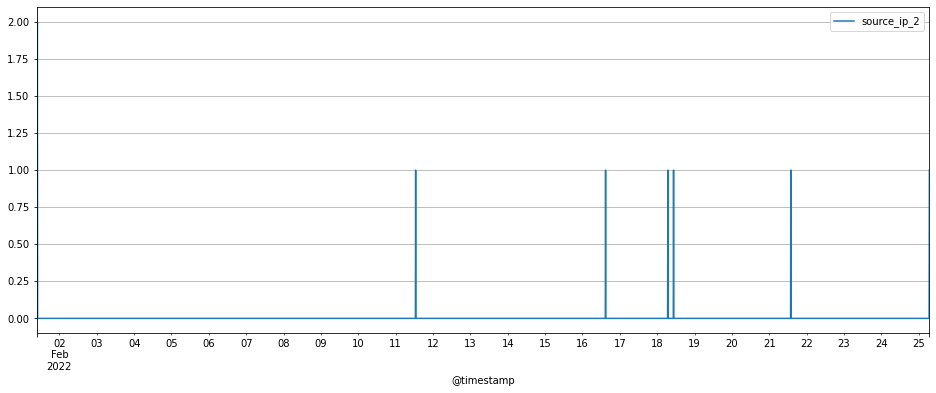

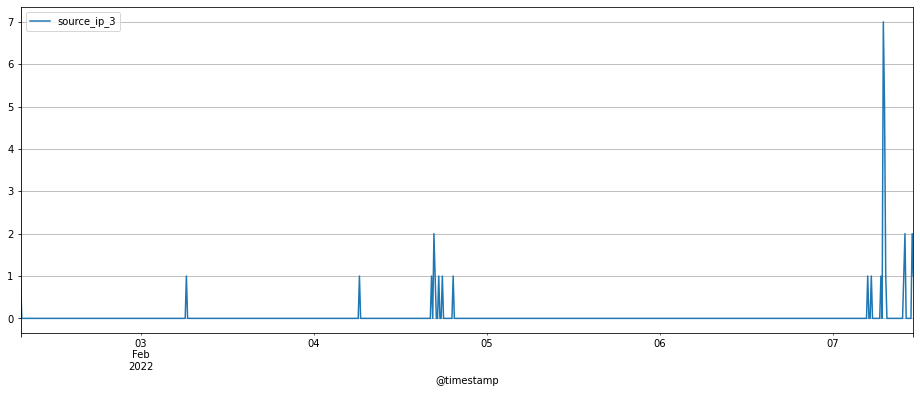

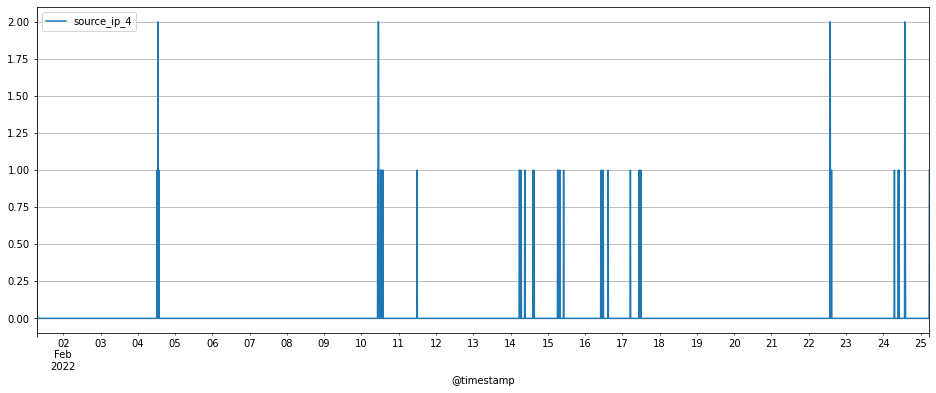

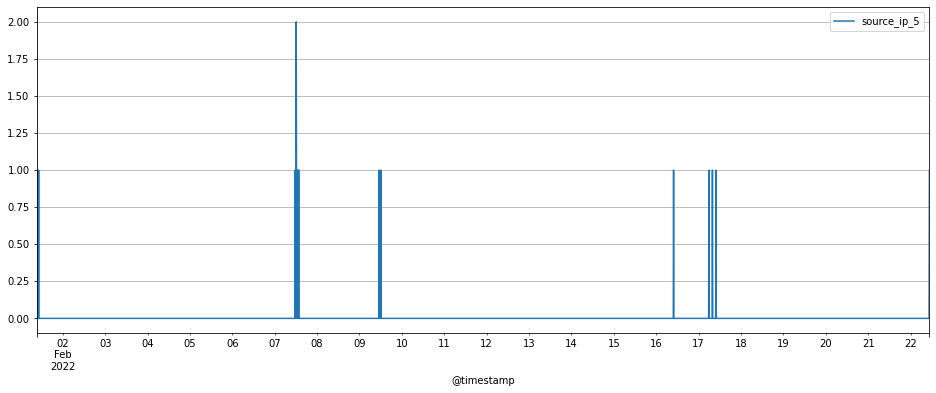

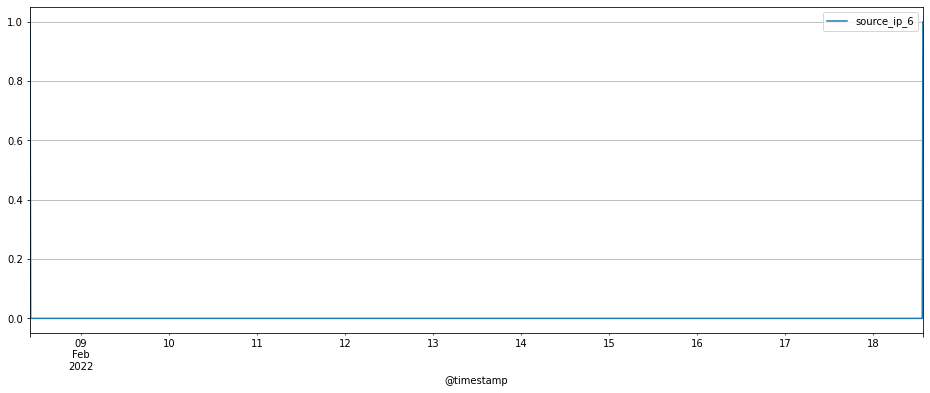

In [21]:
fig, ax = plt.subplots(figsize = (16,6))

for i in np.unique(data['source_ip']['2022-02-1':'2022-02-28']):
    fig, ax = plt.subplots(figsize = (16,6))
    data['source_ip']['2022-02-1':'2022-02-28'][data['source_ip']['2022-02-1':'2022-02-28'] == i].resample('10T').count().plot(label = str(i))

    ax.grid(True)


    ax.legend()

    plt.show()

Уникальные признаки

In [22]:
features = ['target_ip', 'ip', 'category', 'host_id', 'event_id', 'source', 'source_ip']
for i in features:
    print(i, np.unique(data[i]))

target_ip ['target_ip_0' 'target_ip_1' 'target_ip_10' 'target_ip_11' 'target_ip_12'
 'target_ip_2' 'target_ip_3' 'target_ip_4' 'target_ip_5' 'target_ip_6'
 'target_ip_7' 'target_ip_8' 'target_ip_9']
ip ['ip_0' 'ip_1' 'ip_10' 'ip_11' 'ip_12' 'ip_2' 'ip_3' 'ip_4' 'ip_5' 'ip_6'
 'ip_7' 'ip_8' 'ip_9']
category ['category_0' 'category_1' 'category_2']
host_id ['host_id_0' 'host_id_1' 'host_id_10' 'host_id_11' 'host_id_12'
 'host_id_13' 'host_id_2' 'host_id_3' 'host_id_4' 'host_id_5' 'host_id_6'
 'host_id_7' 'host_id_8' 'host_id_9']
event_id [   16  1074  4104  4624  4625  4627  4634  4647  4648  4663  4672  4673
  4688  4689  4698  4702  4738  4768  4776  4778  4779  4985  5140  5142
  5144  5145  8193  8194  8195  8196 10010 12039 53504]
source ['source_0' 'source_1']
source_ip ['source_ip_0' 'source_ip_1' 'source_ip_10' 'source_ip_11' 'source_ip_12'
 'source_ip_13' 'source_ip_14' 'source_ip_15' 'source_ip_16'
 'source_ip_17' 'source_ip_2' 'source_ip_3' 'source_ip_4' 'source_ip_5'
 'source

In [23]:
set(data['action'])

{'AUDIT_SUCCESS', 'ERROR', 'INFO', 'NaN', 'VERBOSE', 'WARNING'}

In [24]:
data['action'].value_counts()

NaN              63323
AUDIT_SUCCESS    12068
INFO               184
VERBOSE            165
WARNING             11
ERROR                3
Name: action, dtype: int64

In [25]:
c = Counter(data['event_id'])
c

Counter({4689: 12218,
         4688: 8652,
         4673: 1050,
         4624: 14446,
         4627: 13396,
         4672: 10021,
         4648: 347,
         4634: 13787,
         4779: 303,
         4776: 451,
         4647: 282,
         4702: 6,
         4778: 89,
         4985: 10,
         4738: 2,
         4698: 1,
         4625: 3,
         16: 57,
         1074: 35,
         10010: 3,
         4768: 257,
         4104: 166,
         53504: 18,
         12039: 37,
         8196: 37,
         8194: 2,
         8193: 4,
         8195: 4,
         5145: 45,
         5140: 21,
         4663: 1,
         5144: 1,
         5142: 2})

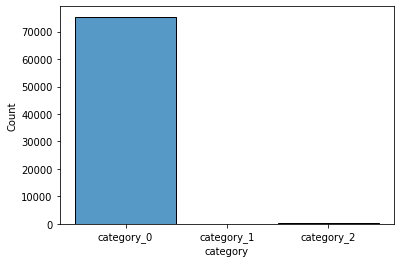

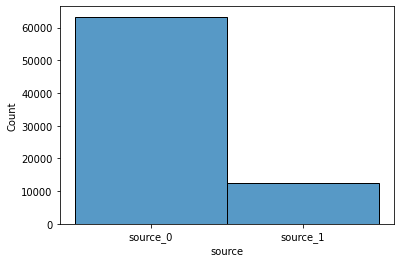

In [26]:
for i in ['category','source']:
    sns.histplot(data[i], palette = 'CMRmap')
    plt.show()

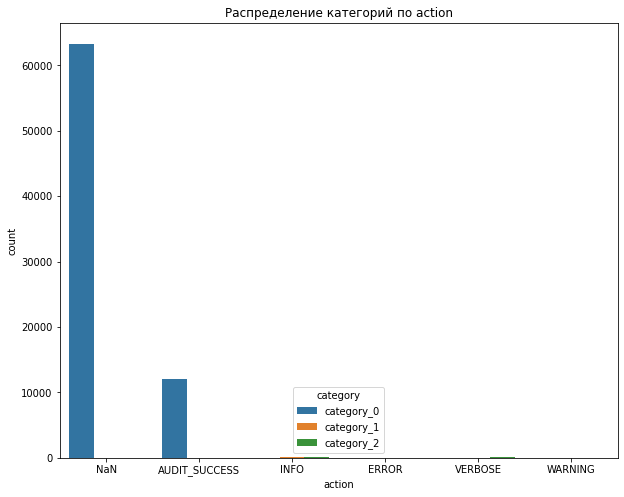

In [27]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='action',hue='category',data=data)
plt.title('Распределение категорий по action')

plt.show()

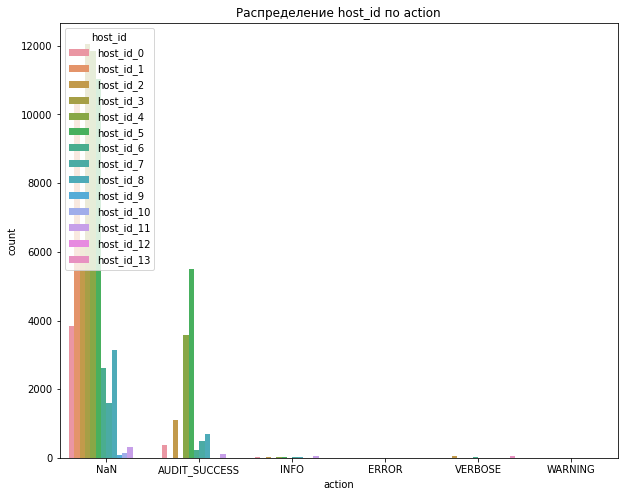

In [28]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='action',hue='host_id',data=data)
plt.title('Распределение host_id по action')

plt.show()

In [29]:
data.groupby(['action','event_id'])['event_id'].count()

action         event_id
AUDIT_SUCCESS  4624         3336
               4627         3130
               4634         3187
               4647           72
               4648           87
               4688         1845
               4768          107
               4776          204
               4778           25
               4779           75
ERROR          10010           3
INFO           16             57
               1074           35
               8196           37
               12039          37
               53504          18
NaN            4624        11110
               4625            3
               4627        10266
               4634        10600
               4647          210
               4648          260
               4663            1
               4672        10021
               4673         1050
               4688         6807
               4689        12218
               4698            1
               4702            6
               4738

In [30]:
data.groupby(['action','event_id'])['event_id'].count()

action         event_id
AUDIT_SUCCESS  4624         3336
               4627         3130
               4634         3187
               4647           72
               4648           87
               4688         1845
               4768          107
               4776          204
               4778           25
               4779           75
ERROR          10010           3
INFO           16             57
               1074           35
               8196           37
               12039          37
               53504          18
NaN            4624        11110
               4625            3
               4627        10266
               4634        10600
               4647          210
               4648          260
               4663            1
               4672        10021
               4673         1050
               4688         6807
               4689        12218
               4698            1
               4702            6
               4738

In [31]:
data.groupby(['action','host_id'])['event_id'].count()

action         host_id   
AUDIT_SUCCESS  host_id_0       370
               host_id_11      103
               host_id_2      1091
               host_id_4      3583
               host_id_5      5498
               host_id_6       233
               host_id_7       494
               host_id_8       696
ERROR          host_id_8         3
INFO           host_id_0        13
               host_id_11       61
               host_id_13        2
               host_id_2        30
               host_id_4        16
               host_id_5        21
               host_id_6         8
               host_id_7        17
               host_id_8        16
NaN            host_id_0      3846
               host_id_1     10346
               host_id_10      155
               host_id_11      314
               host_id_12        4
               host_id_2      6271
               host_id_3     12059
               host_id_4     11861
               host_id_5     11033
               host_id_6     

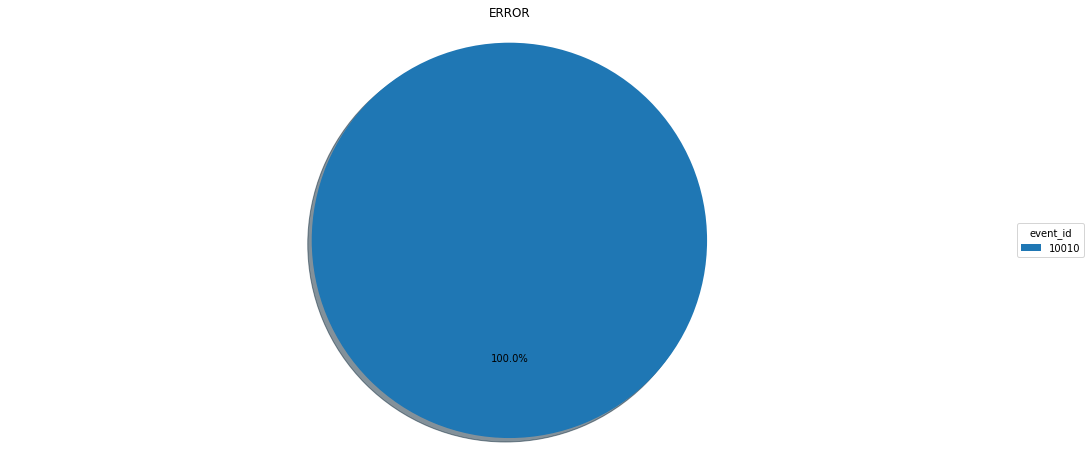

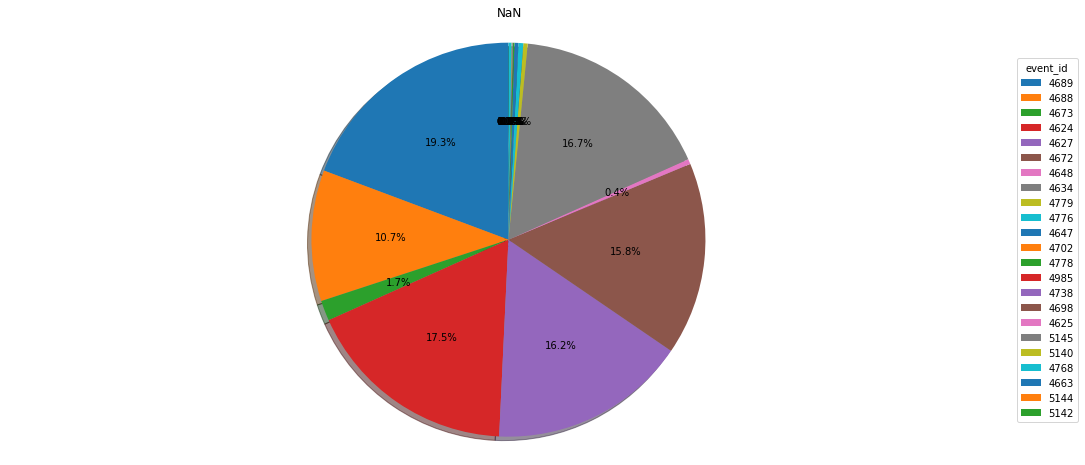

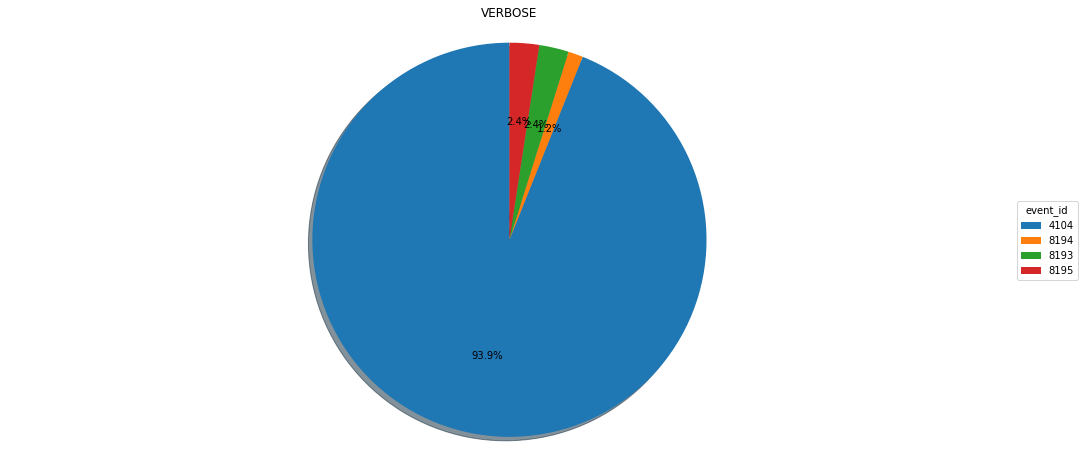

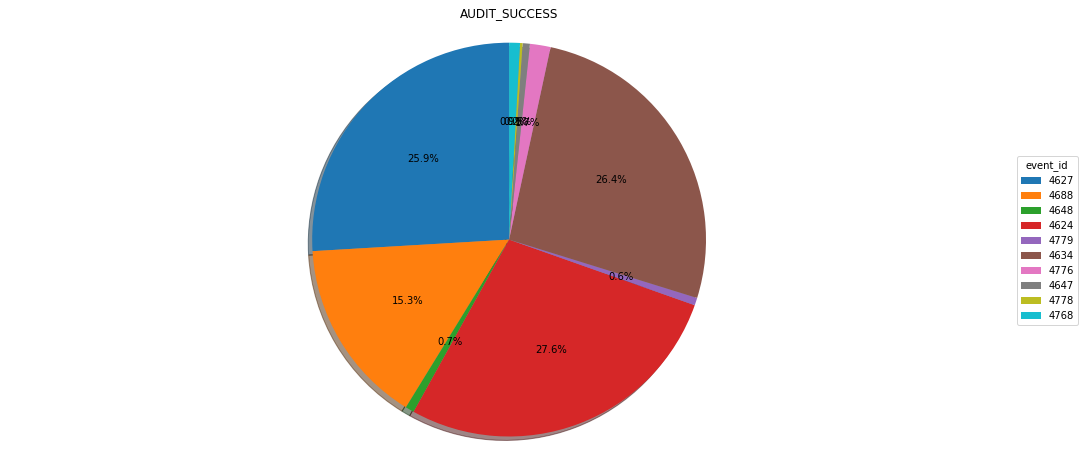

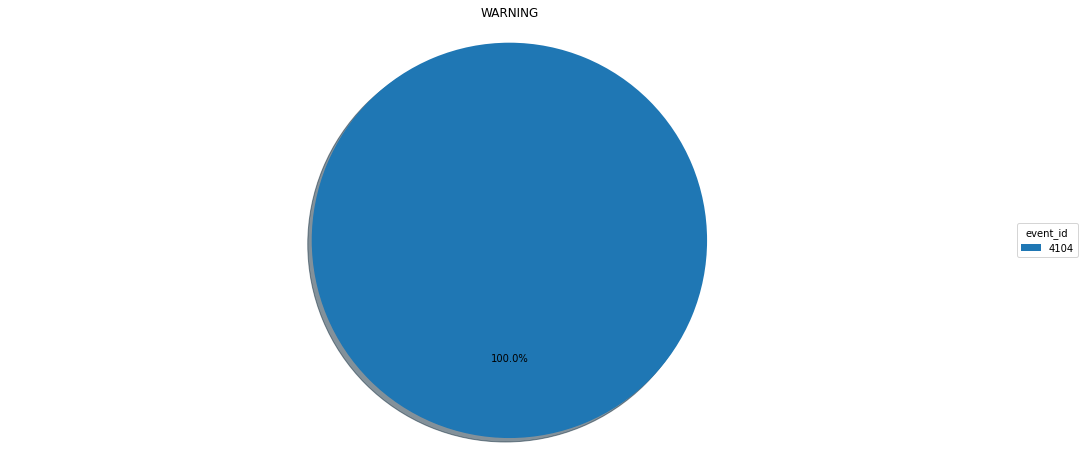

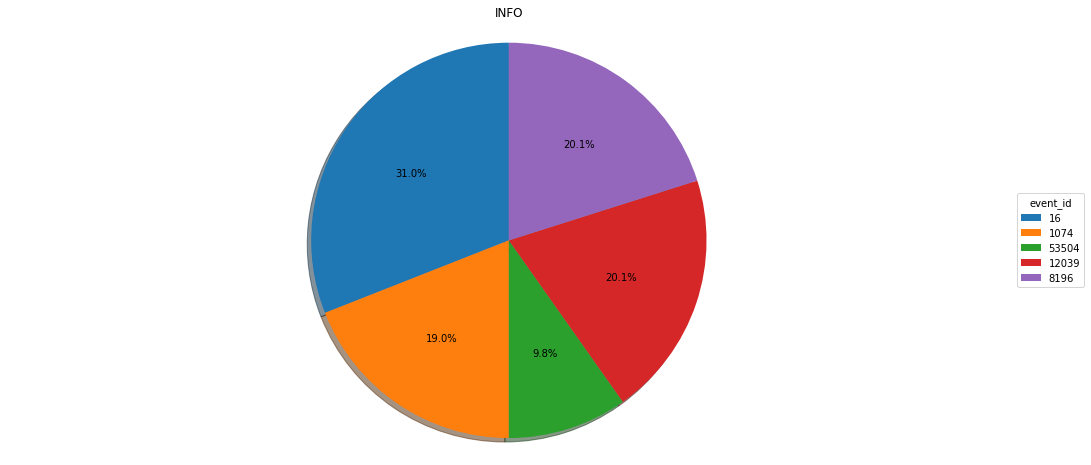

In [32]:
for i in list(set(data['action'])):
    labels = list(Counter(data['event_id'][data['action']==i]).keys())
    sizes = list(Counter(data['event_id'][data['action']==i]).values()) 

    fig1, ax1 = plt.subplots(figsize=(18,8))
    ax1.pie(sizes,  autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  

    ax1.legend(labels,
              title="event_id",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))


    ax1.set_title(i)

    plt.show()

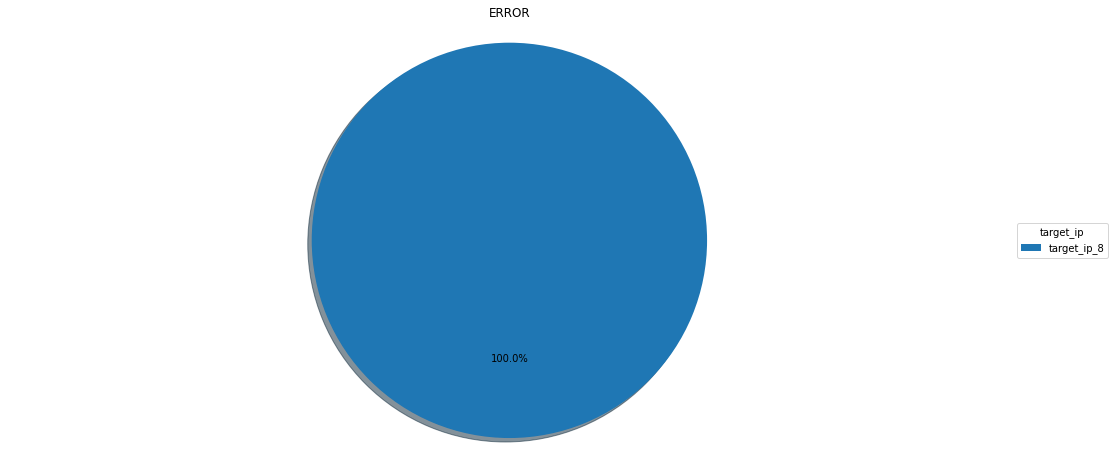

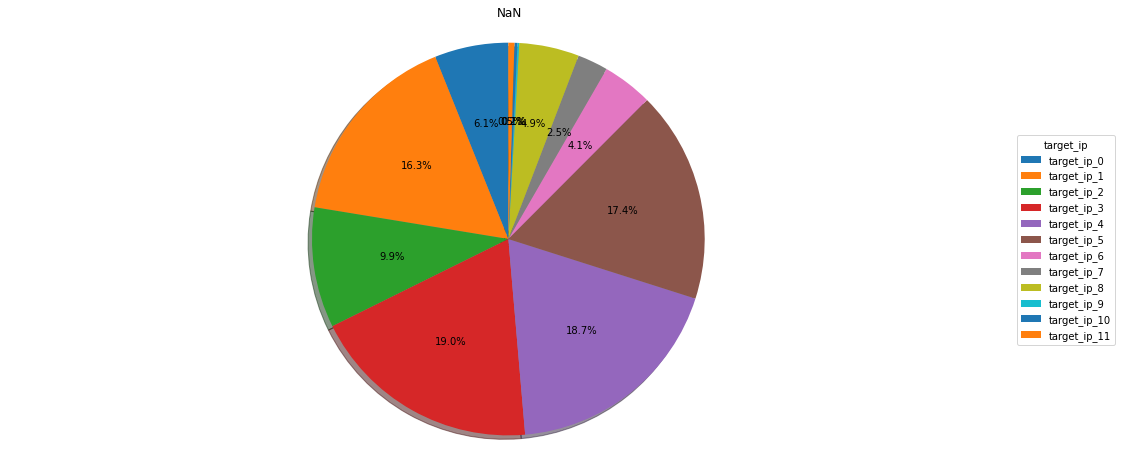

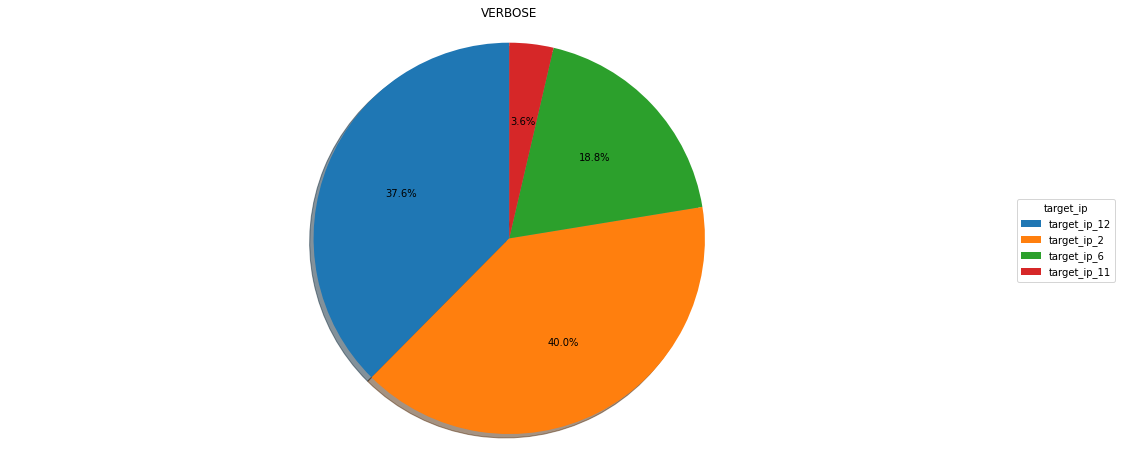

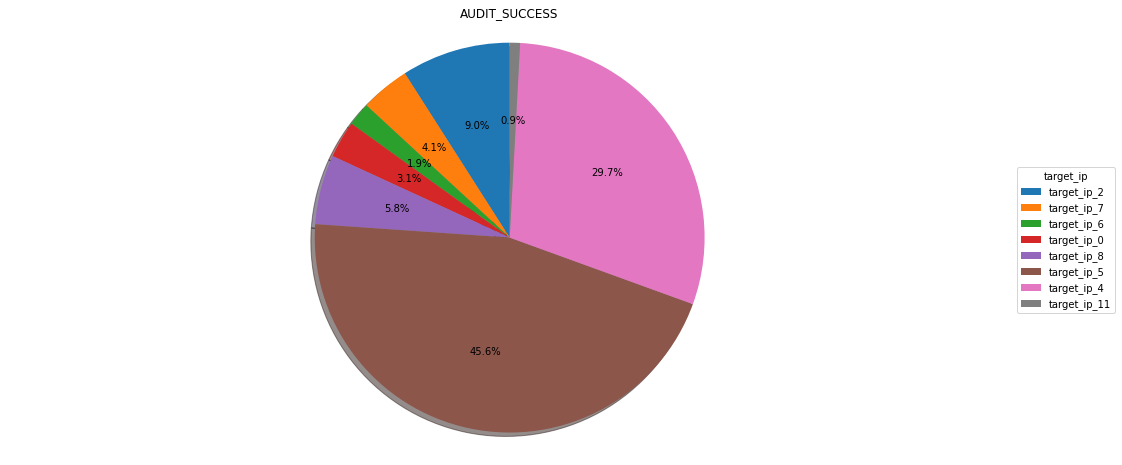

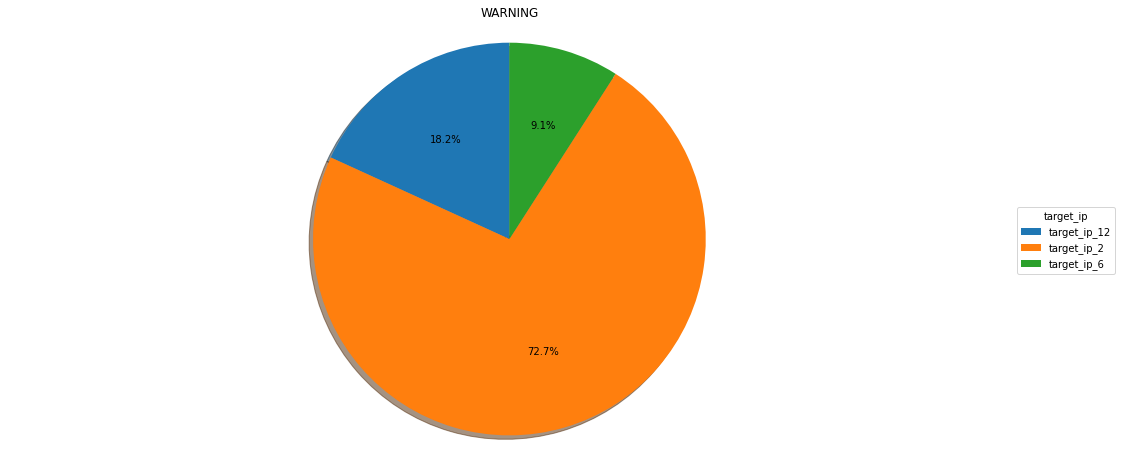

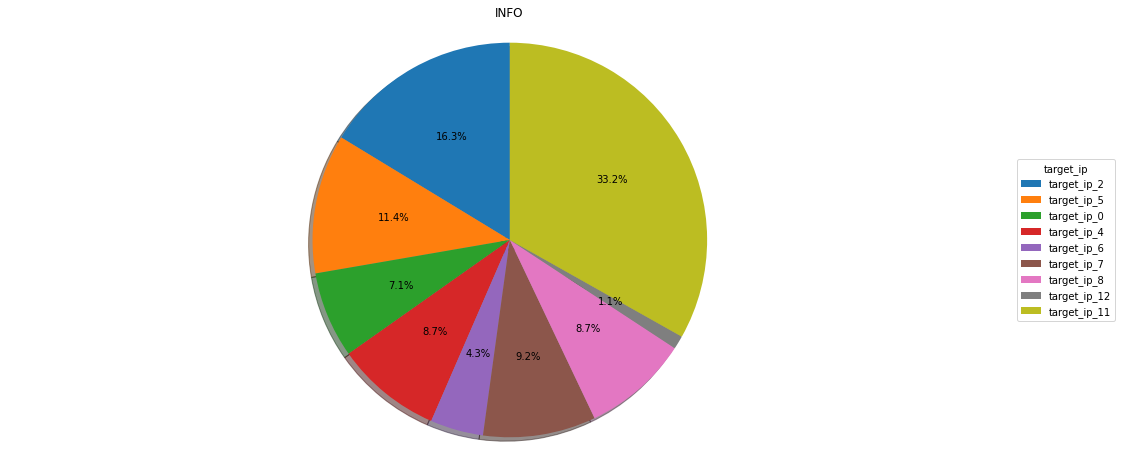

In [33]:
for i in list(set(data['action'])):
    labels = list(Counter(data['target_ip'][data['action']==i]).keys())
    sizes = list(Counter(data['target_ip'][data['action']==i]).values()) 

    fig1, ax1 = plt.subplots(figsize=(18,8))
    ax1.pie(sizes,  autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  

    ax1.legend(labels,
              title="target_ip",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))


    ax1.set_title(i)

    plt.show()